In [1]:
import pandas as pd
import sys
from datetime import date, datetime
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
sys.path.insert(0,"..")
from nextbike.preprocessing.Preprocessor import Preprocessor

In [3]:
bremen= Preprocessor("../data")


In [4]:
Preprocessor.clean_dataset(bremen)

In [5]:
bremen_cleaned = Preprocessor._get_cleaned(bremen)

In [6]:
bremen_cleaned.info()
bremen_cleaned.head()
bremen_cleaned.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654495 entries, 0 to 654494
Data columns (total 13 columns):
datetime        654495 non-null datetime64[ns]
b_number        654495 non-null int64
b_bike_type     654495 non-null int64
p_spot          654495 non-null bool
p_place_type    654495 non-null int64
trip            654495 non-null object
p_uid           654495 non-null int64
p_bikes         654495 non-null int64
p_name          654495 non-null object
p_number        654495 non-null float64
p_bike          654495 non-null bool
p_lat           654495 non-null float64
p_lng           654495 non-null float64
dtypes: bool(2), datetime64[ns](1), float64(3), int64(5), object(2)
memory usage: 56.2+ MB


datetime        186327
b_number           443
b_bike_type          2
p_spot               2
p_place_type         3
trip                 4
p_uid           157157
p_bikes             32
p_name            5973
p_number            79
p_bike               2
p_lat            25057
p_lng            85611
dtype: int64

In [7]:
Preprocessor.create_trips(bremen)

In [8]:
bremen_trips = pd.read_csv("../data/processed/trips.csv")

In [9]:
display(bremen_trips.head(), bremen_trips.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232845 entries, 0 to 232844
Data columns (total 12 columns):
bike              232845 non-null int64
bike_type         232845 non-null int64
identification    232845 non-null int64
start_time        232845 non-null object
end_time          232845 non-null object
duration_sec      232845 non-null float64
start_lng         232845 non-null float64
start_lat         232845 non-null float64
end_lng           232845 non-null float64
end_lat           232845 non-null float64
start_place       232845 non-null float64
end_place         232845 non-null float64
dtypes: float64(7), int64(3), object(2)
memory usage: 21.3+ MB


bike  bike_type  identification           start_time             end_time  \
0  20507         29        10278649  2019-04-14 16:02:00  2019-04-14 16:09:00   
1  20507         29        10278649  2019-04-15 16:08:00  2019-04-15 16:15:00   
2  20507         29        10278649  2019-04-18 21:45:00  2019-04-18 21:47:00   
3  20507         29        10278649  2019-04-18 21:51:00  2019-04-18 21:53:00   
4  20507         29        10278649  2019-04-18 21:56:00  2019-04-18 21:58:00   

   duration_sec  start_lng  start_lat   end_lng    end_lat  start_place  \
0         420.0   8.884911  53.078923  8.884911  53.078923       2985.0   
1         420.0   8.884911  53.078923  8.884911  53.078923       2985.0   
2         120.0   8.884911  53.078923  8.884911  53.078923       2985.0   
3         120.0   8.884911  53.078923  8.884911  53.078923       2985.0   
4         120.0   8.884911  53.078923  8.884911  53.078923       2985.0   

   end_place  
0     2985.0  
1     2985.0  
2     2985.0  
3     2985.0  
4     2985.0

None

In [10]:
# sort starting time
bremen_trips = bremen_trips.sort_values(by=['start_time'], ascending=True)

In [11]:
bremen_trips.head()

bike  bike_type  identification           start_time  \
81821   20685         71        12099440  2019-01-20 00:13:00   
53590   20626         71        10278649  2019-01-20 00:16:00   
204560  20935         71         7873316  2019-01-20 00:35:00   
49030   20617         71        12099749  2019-01-20 00:40:00   
131464  20795         71        12099872  2019-01-20 00:47:00   

                   end_time  duration_sec  start_lng  start_lat   end_lng  \
81821   2019-01-20 00:23:00         600.0   8.812554  53.076481  8.804828   
53590   2019-01-20 04:47:00       16260.0   8.884911  53.078923  8.884911   
204560  2019-01-25 08:00:00      458700.0   8.816798  53.072448  8.811472   
49030   2019-01-20 00:44:00         240.0   8.801623  53.067878  8.793217   
131464  2019-01-20 00:54:00         420.0   8.814744  53.084841  8.801135   

          end_lat  start_place  end_place  
81821   53.084196          0.0        0.0  
53590   53.078923       2985.0     2985.0  
204560  53.083167          0.0     2946.0  
49030   53.064244          0.0        0.0  
131464  53.094596          0.0        0.0

In [12]:
# convert column to datetime
bremen_trips["start_time"] = pd.to_datetime(bremen_trips["start_time"])

In [13]:
# create new features/columns: month, weekday, date of booking
for col in ['start_time']:
    bremen_trips['month'] = pd.DatetimeIndex(bremen_trips['start_time']).month
    bremen_trips['booking_date'] = bremen_trips.start_time.dt.date
    bremen_trips['weekdays'] = pd.DatetimeIndex(bremen_trips['start_time']).weekday


In [14]:
display(bremen_trips.head(),bremen_trips.tail())

bike  bike_type  identification          start_time  \
81821   20685         71        12099440 2019-01-20 00:13:00   
53590   20626         71        10278649 2019-01-20 00:16:00   
204560  20935         71         7873316 2019-01-20 00:35:00   
49030   20617         71        12099749 2019-01-20 00:40:00   
131464  20795         71        12099872 2019-01-20 00:47:00   

                   end_time  duration_sec  start_lng  start_lat   end_lng  \
81821   2019-01-20 00:23:00         600.0   8.812554  53.076481  8.804828   
53590   2019-01-20 04:47:00       16260.0   8.884911  53.078923  8.884911   
204560  2019-01-25 08:00:00      458700.0   8.816798  53.072448  8.811472   
49030   2019-01-20 00:44:00         240.0   8.801623  53.067878  8.793217   
131464  2019-01-20 00:54:00         420.0   8.814744  53.084841  8.801135   

          end_lat  start_place  end_place  month booking_date  weekdays  
81821   53.084196          0.0        0.0      1   2019-01-20         6  
53590   53.078923       2985.0     2985.0      1   2019-01-20         6  
204560  53.083167          0.0     2946.0      1   2019-01-20         6  
49030   53.064244          0.0        0.0      1   2019-01-20         6  
131464  53.094596          0.0        0.0      1   2019-01-20         6

bike  bike_type  identification          start_time  \
220079  20965         71        26519958 2019-12-31 23:41:00   
116087  20757         71        26520201 2019-12-31 23:44:00   
209971  20946         71        26520104 2019-12-31 23:48:00   
123555  20776         71        26520101 2019-12-31 23:48:00   
113816  20751         71        26520148 2019-12-31 23:51:00   

                   end_time  duration_sec  start_lng  start_lat   end_lng  \
220079  2019-12-31 23:49:00         480.0   8.871098  53.077498  8.872118   
116087  2019-12-31 23:59:00         900.0   8.821334  53.081942  8.806207   
209971  2019-12-31 23:55:00         420.0   8.779235  53.078581  8.790776   
123555  2019-12-31 23:55:00         420.0   8.779235  53.078581  8.790580   
113816  2019-12-31 23:57:00         360.0   8.815570  53.054449  8.811623   

          end_lat  start_place  end_place  month booking_date  weekdays  
220079  53.082471          0.0        0.0     12   2019-12-31         1  
116087  53.078418          0.0        0.0     12   2019-12-31         1  
209971  53.078867       2966.0        0.0     12   2019-12-31         1  
123555  53.078867       2966.0        0.0     12   2019-12-31         1  
113816  53.060347          0.0        0.0     12   2019-12-31         1

# Analyzing trip duration in sum

In [15]:
bremen_trips["duration_sec"].describe().astype(int)   # kann mir nicht so viel unter Sekunden auf anhib vorstellen

count      232845
mean         9435
std        175228
min           120
25%           180
50%           420
75%           960
max      21399300
Name: duration_sec, dtype: int64

In [16]:
# create duration min, to better understand the data
bremen_trips["duration_min"] = bremen_trips["duration_sec"]/60

In [17]:
bremen_trips["duration_min"].describe().astype(int)

count    232845
mean        157
std        2920
min           2
25%           3
50%           7
75%          16
max      356655
Name: duration_min, dtype: int64

- As we can see here, we have at least one outlier (max 356.655 minutes). 
- 75% of the trips have a duration of ≤ 16 minutes, but the mean is 157 minutes, while the median is 7 minutes. This means, that we have a positive skew, which indicates outliers as well
- Additionally, we have a high standard deviation of 2920 minutes. 

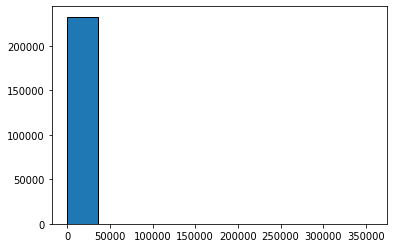

In [18]:
#Booking period (rented_minutes) for each booking -> frequency distribution
plt.hist(bremen_trips["duration_min"], bins = 10,edgecolor='k')
plt.show()

In [19]:
bremen_trips[bremen_trips["duration_min"]== 356655] 
## Question: Is this a booking mistake? Who rents a bike for 8 months?

bike  bike_type  identification          start_time  \
217894  20961         71         7873893 2019-03-10 20:08:00   

                   end_time  duration_sec  start_lng  start_lat   end_lng  \
217894  2019-11-13 12:23:00    21399300.0   8.805269  53.091262  8.779235   

          end_lat  start_place  end_place  month booking_date  weekdays  \
217894  53.078581          0.0     2966.0      3   2019-03-10         6   

        duration_min  
217894      356655.0

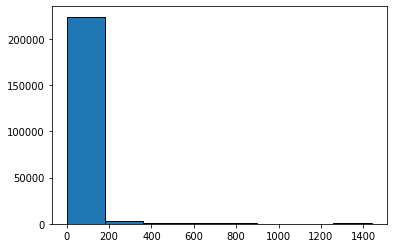

In [20]:
#lets have a look at the distribution of bookings with a duration less than 1 day
subsetRentedminutes = bremen_trips[bremen_trips["duration_min"].dropna(axis = 0) < 1440]  # 229892 entries in this subset
plt.hist(subsetRentedminutes["duration_min"], bins = 8 ,edgecolor='k')
plt.show()

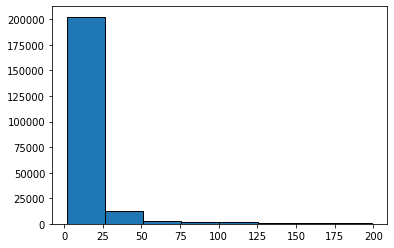

In [21]:
#lets have a look at the distribution of bookings with a duration less than 200 minutes
subsetRentedminutes_200 = bremen_trips[bremen_trips["duration_min"].dropna(axis = 0) < 200]
plt.hist(subsetRentedminutes_200["duration_min"], bins = 8 ,edgecolor='k')
plt.show()

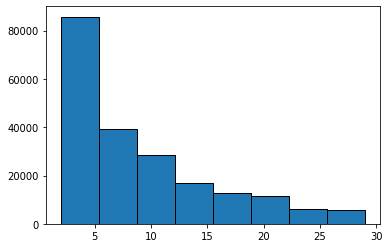

In [22]:
#lets have a look at the distribution of bookings with a duration less than 30 minutes
subsetRentedminutes_30 = bremen_trips[bremen_trips["duration_min"].dropna(axis = 0) < 30]
plt.hist(subsetRentedminutes_30["duration_min"], bins = 8 ,edgecolor='k')
plt.show()

Only 2953 trips are longer than 1 day. More than 200.000 trips take less than 200 minutes.
If we have an even closer look we can see that approximately 200.000 bookings have a duration of less than 30 minutes.
The last graphic displays the distribution of bookings less than 30 minutes and we can see, that more than half of the people use the bikes for short trips up to 10 minutes.

In [23]:
#Sum rented minutes a day
day_rented_minutes = (bremen_trips.groupby('booking_date')
                                 .duration_min.sum()
                              )
day_rented_minutes.describe().astype(int)



count        312
mean      117366
std       156680
min         3262
25%        33208
50%        69698
75%       130467
max      1748036
Name: duration_min, dtype: int64

We have only bookings on 312 days of the year, many days are missing totally.
Here, we can see again that the mean is less robust next to the median, we have a positive skew.

In [24]:
#defining a lineplot: data = dataset; xlabel; ylabel; filename = give it a filename, to save the lineplot as .png
def lineplot (data, xlabel, ylabel, filename): 
    Fig_1 = plt.figure(figsize=(15,6),dpi = 300)
    ax = Fig_1.add_axes([0,0,1,1])

    ax.plot(data)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel) 
    plt.savefig("../pictures/"+str(filename)+".png", dpi = 300)

/Users/dianagowalow/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


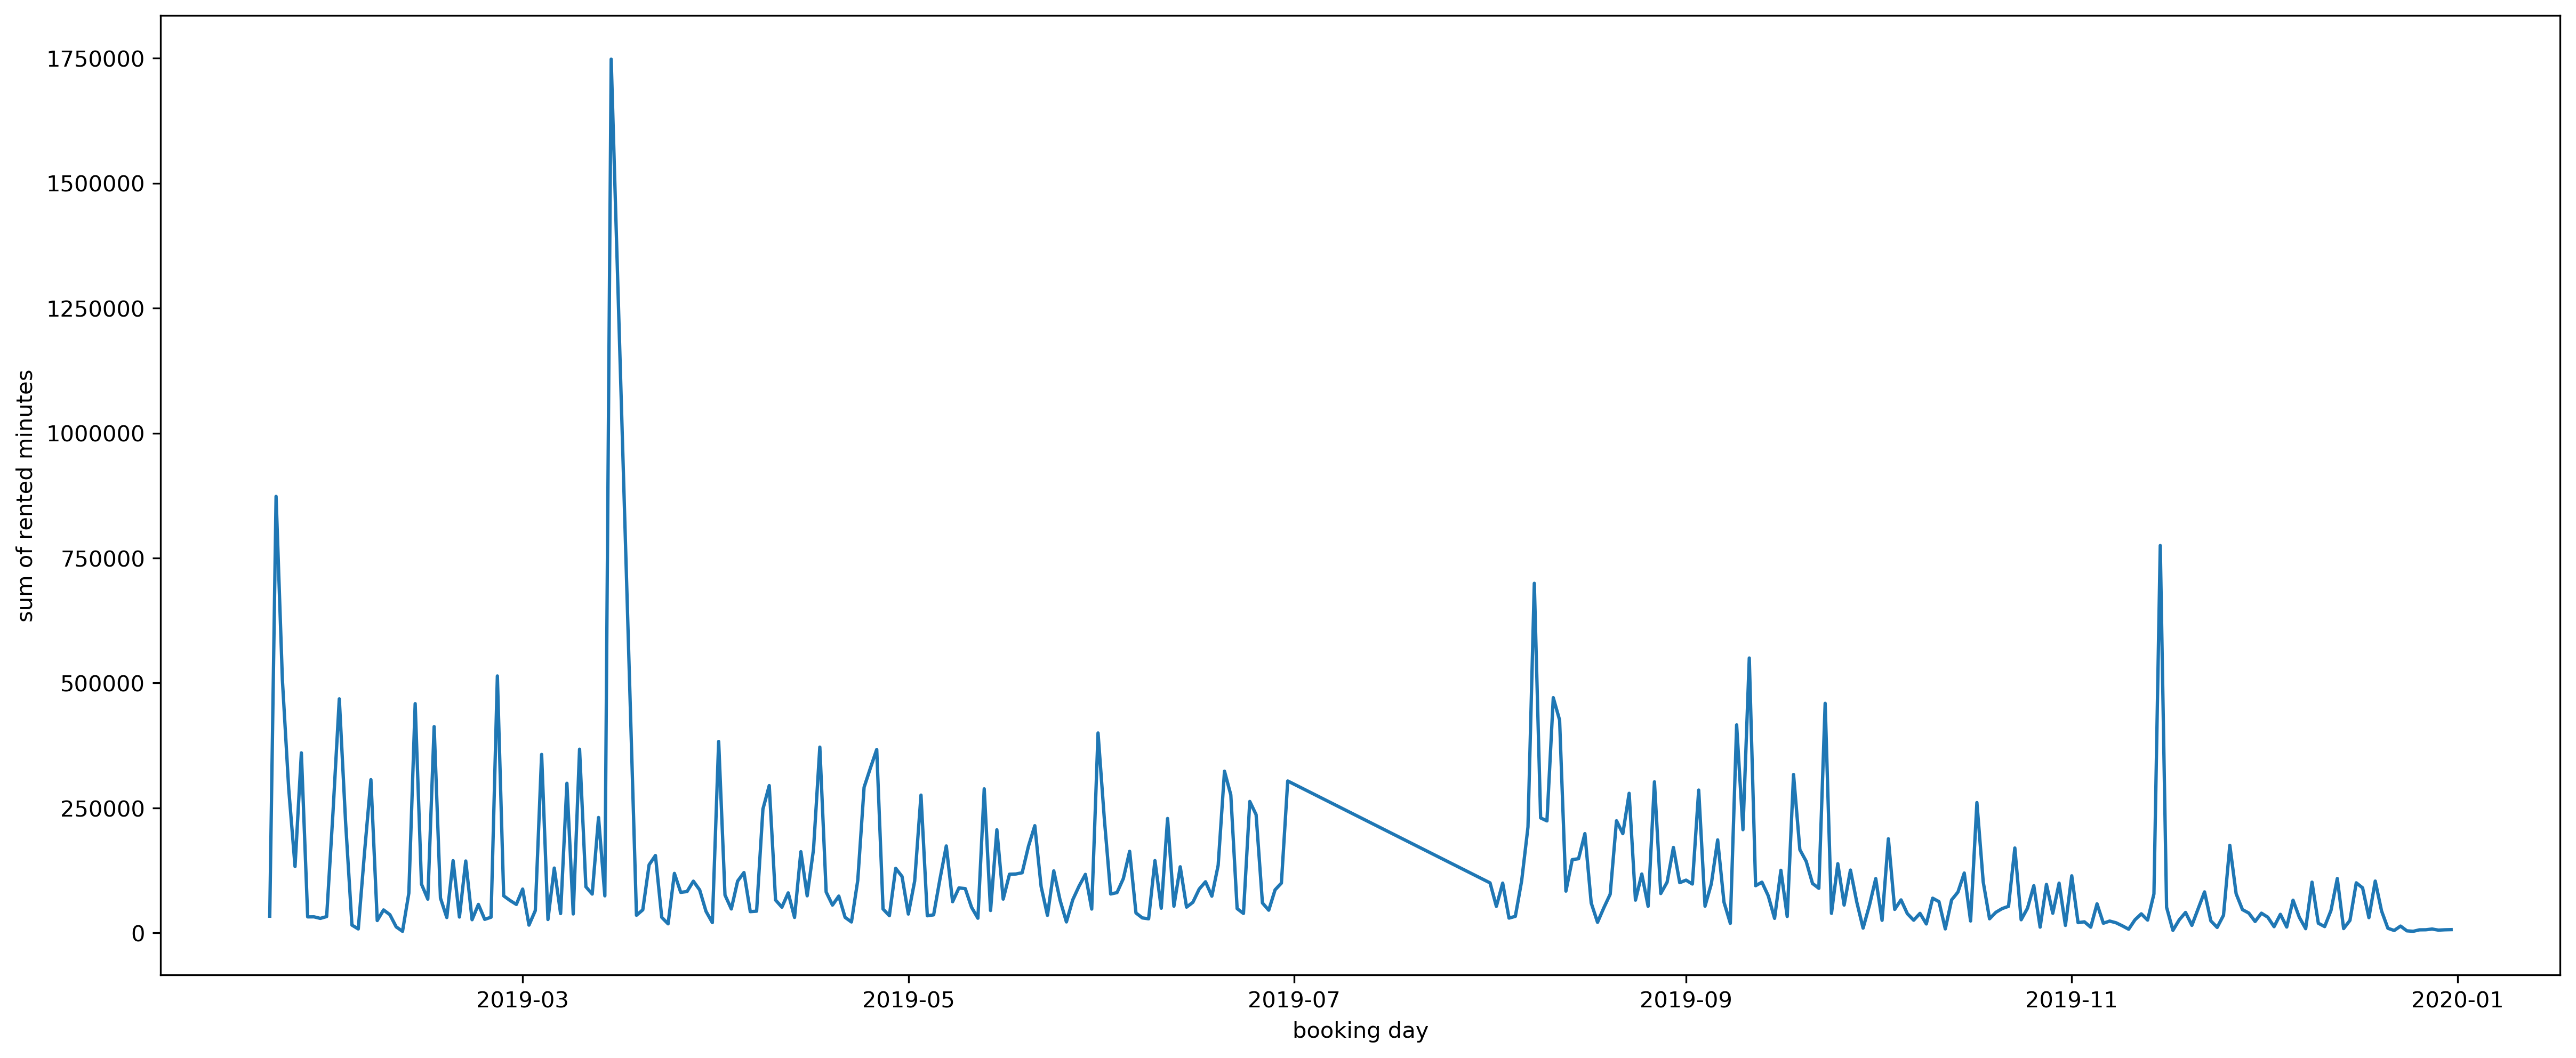

In [25]:
lineplot(day_rented_minutes,"booking day", "sum of rented minutes", "daily rented minutes")

Das sieht irgendwie nicht aus wie ein typischer Graph für Fahrradausleihen... Jahreszeitenabhängige Ausleihe nicht erkennbar. Im Sommer fehlen irgendwie die Einträge.. vergleichen wir mal mit dem Subset von rented minutes

In [26]:
#Sum rented minutes a day <200 min duration
sub_day_rented_minutes = (subsetRentedminutes.groupby('booking_date')
                                 .duration_min.sum()
                              )
sub_day_rented_minutes.describe().astype(int)

count       312
mean      19859
std       11864
min        2399
25%       11317
50%       18003
75%       26266
max      129618
Name: duration_min, dtype: int64

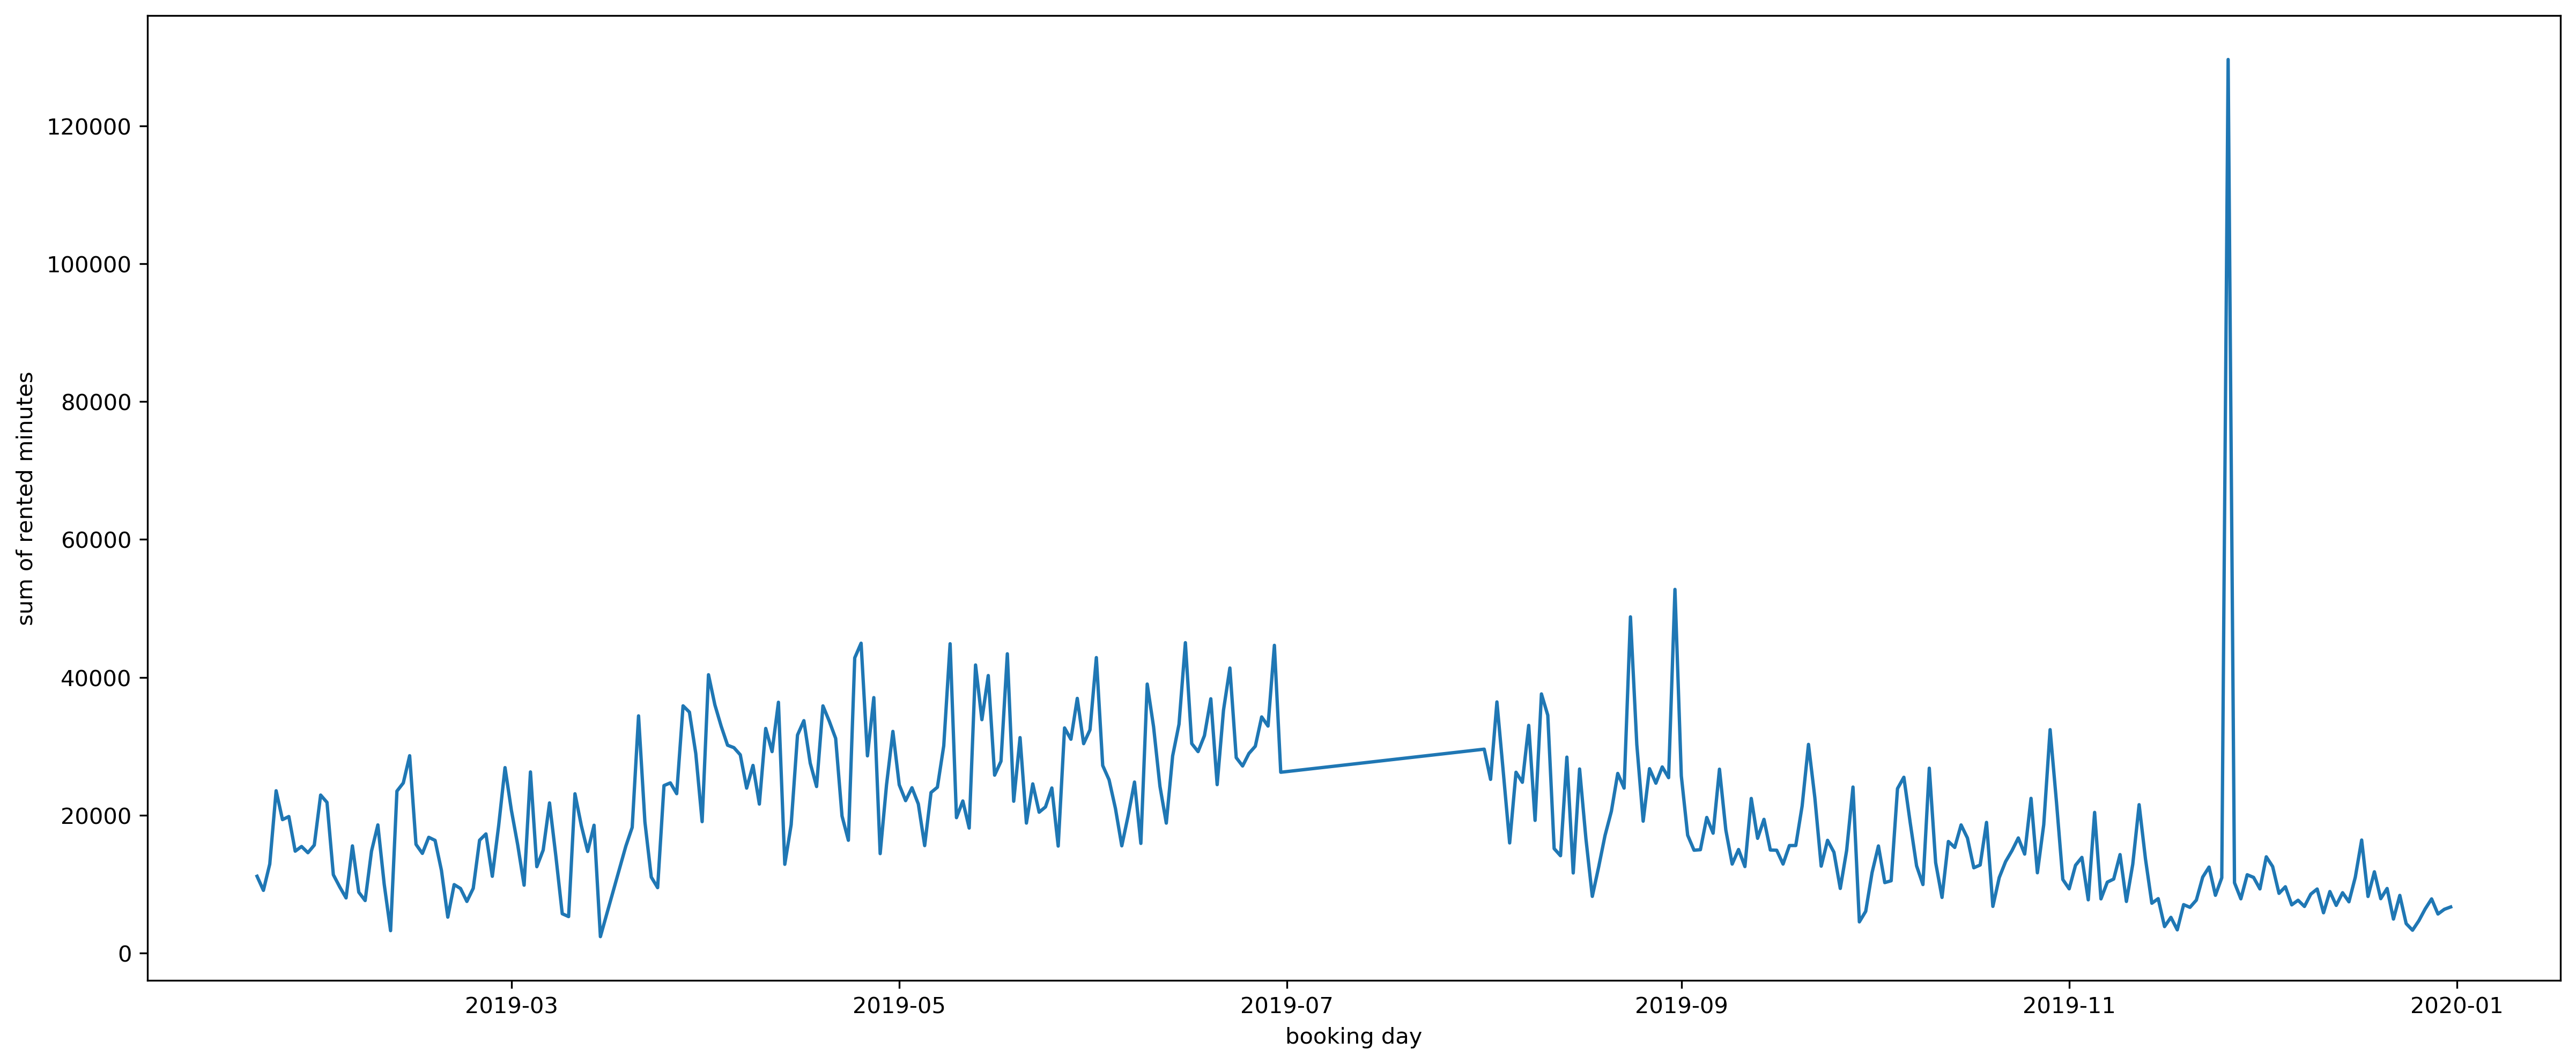

In [27]:
#Lineplot daily rented minutes subset
lineplot(sub_day_rented_minutes,"booking day", "sum of rented minutes", "sub_day_rented_minutes" )

In [28]:
#Sum rented minutes a day <200 min duration
sub_day_rented_minutes2 = (subsetRentedminutes_200.groupby('booking_date')
                                 .duration_min.sum()
                              )
sub_day_rented_minutes2.describe().astype(int)

count      312
mean      9716
std       4495
min       1869
25%       6262
50%       9058
75%      12660
max      26052
Name: duration_min, dtype: int64

In [29]:
#Sum rented minutes a day <30 min duration
sub_day_rented_minutes3 = (subsetRentedminutes_30.groupby('booking_date')
                                 .duration_min.sum()
                              )
sub_day_rented_minutes3.describe().astype(int)

count      312
mean      5739
std       2593
min        530
25%       3890
50%       5583
75%       7503
max      17330
Name: duration_min, dtype: int64

If we have a look at the subsets of rented minutes below 200 or 30 minutes, we see that mean and median are closer to each other, which implicates a less skewed distribution. 
Additionally, the standard deviation is not higher than the mean anymore. 

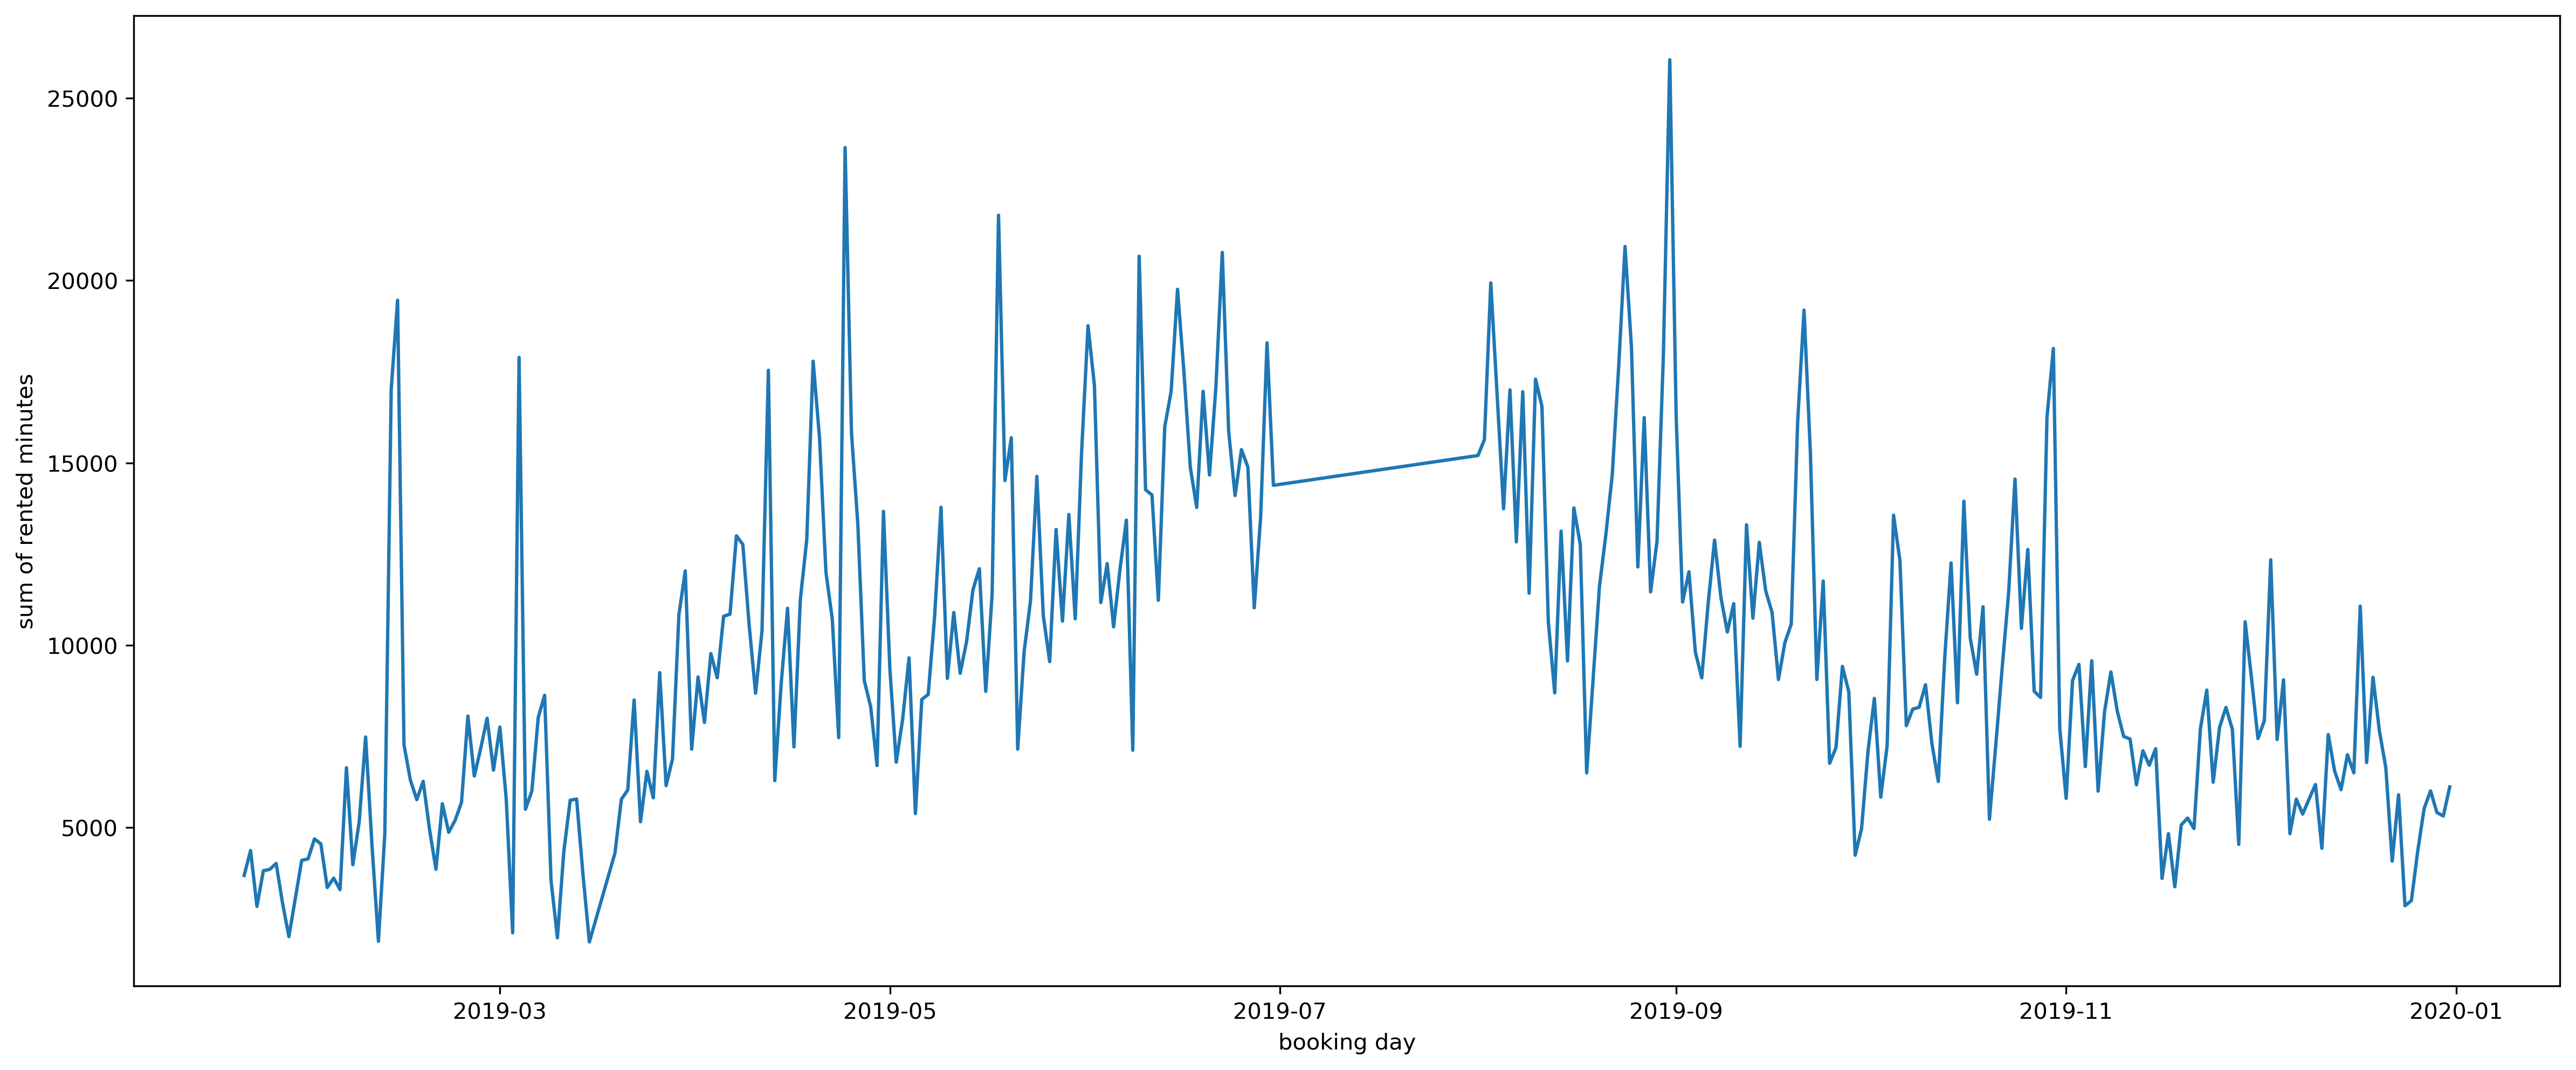

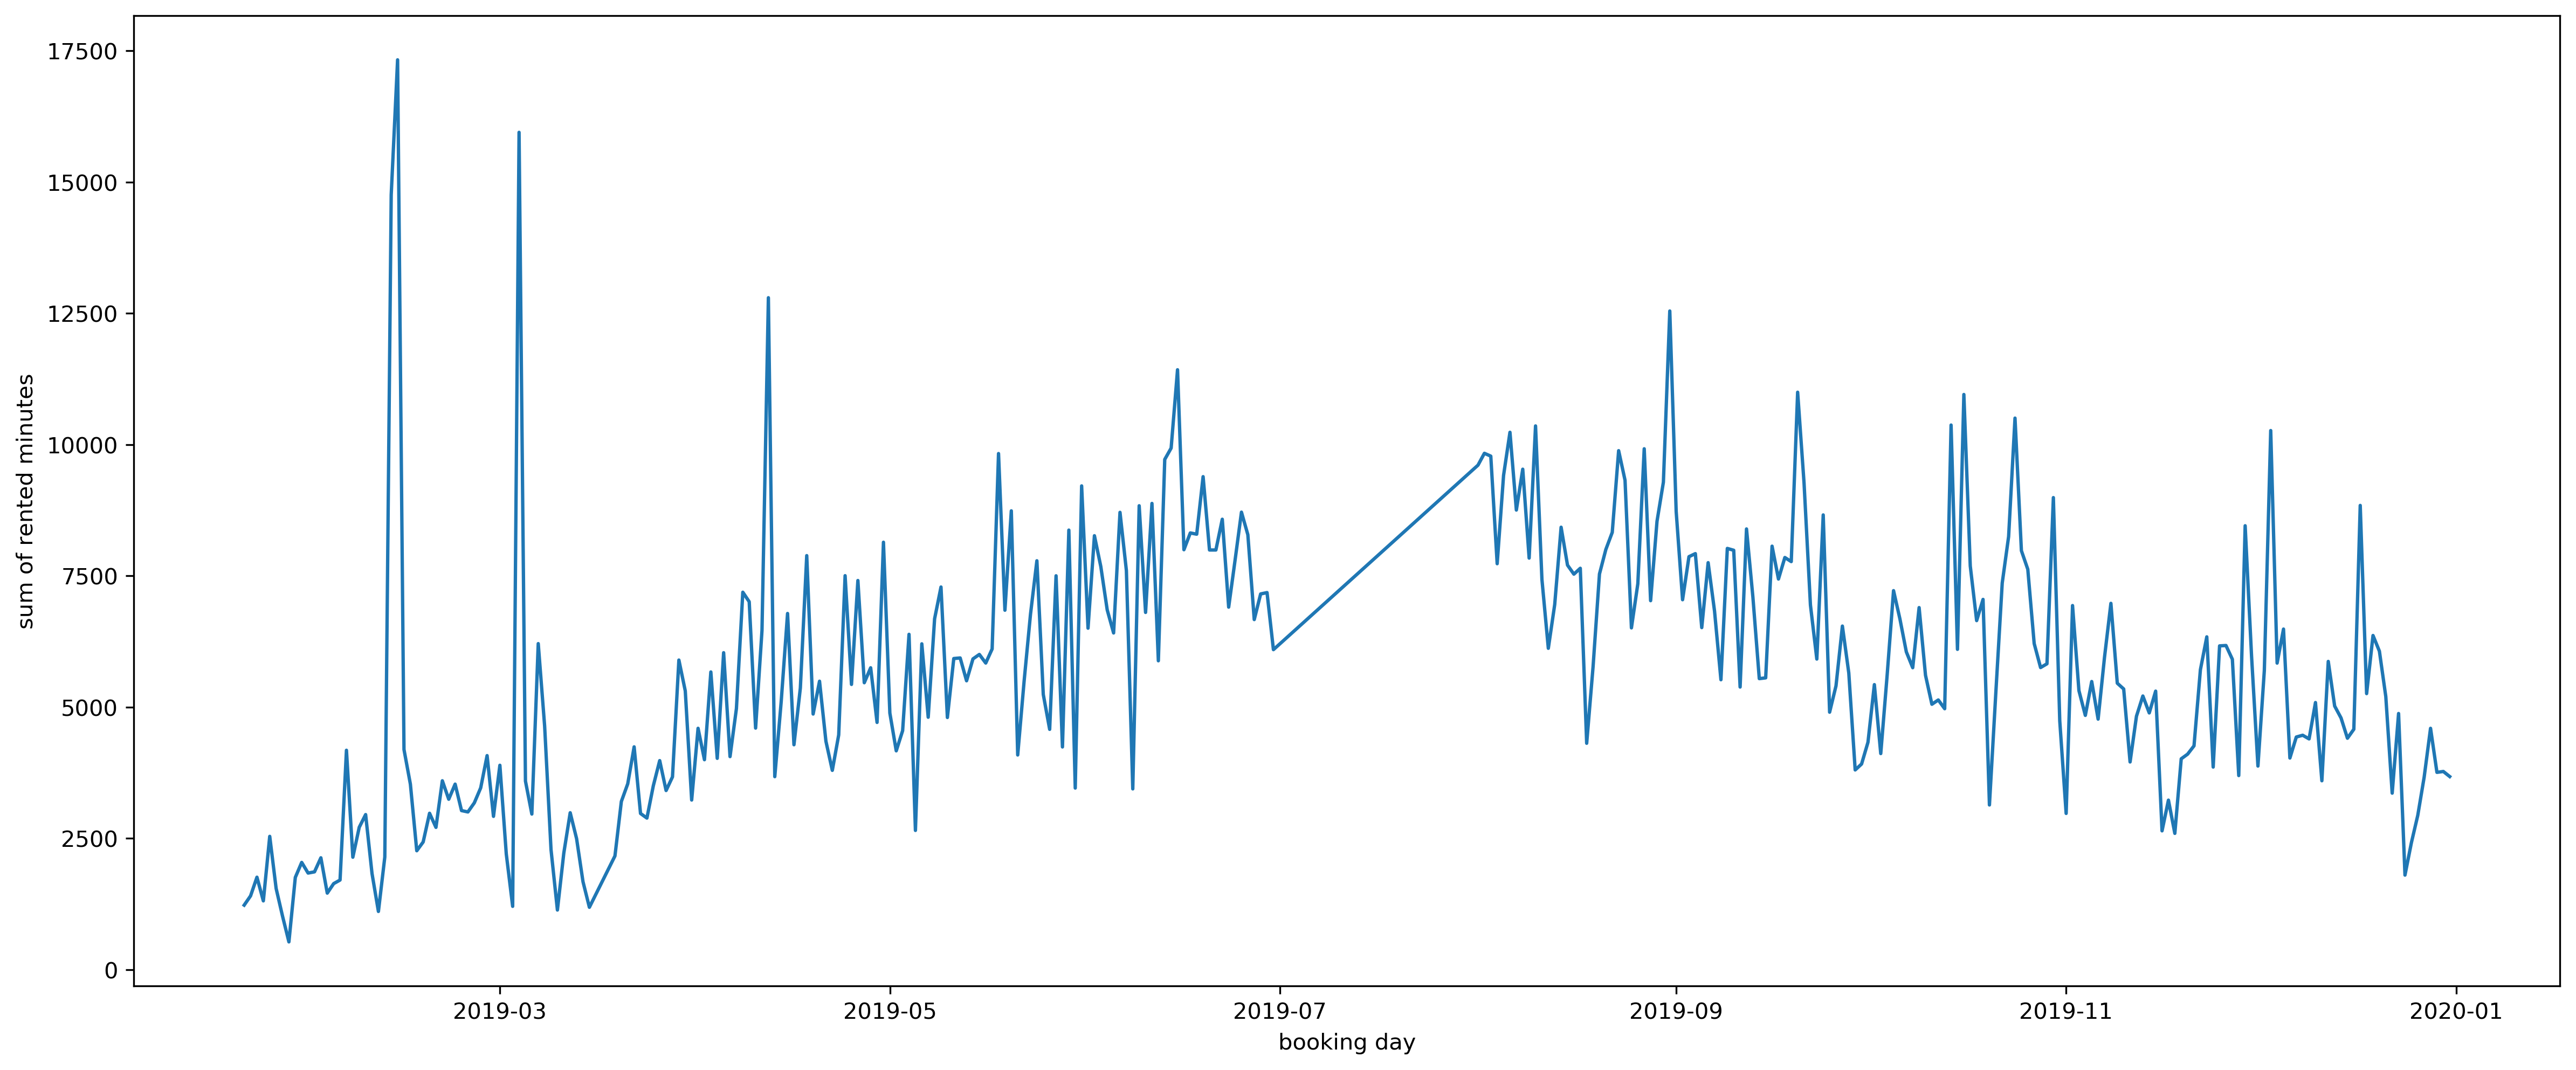

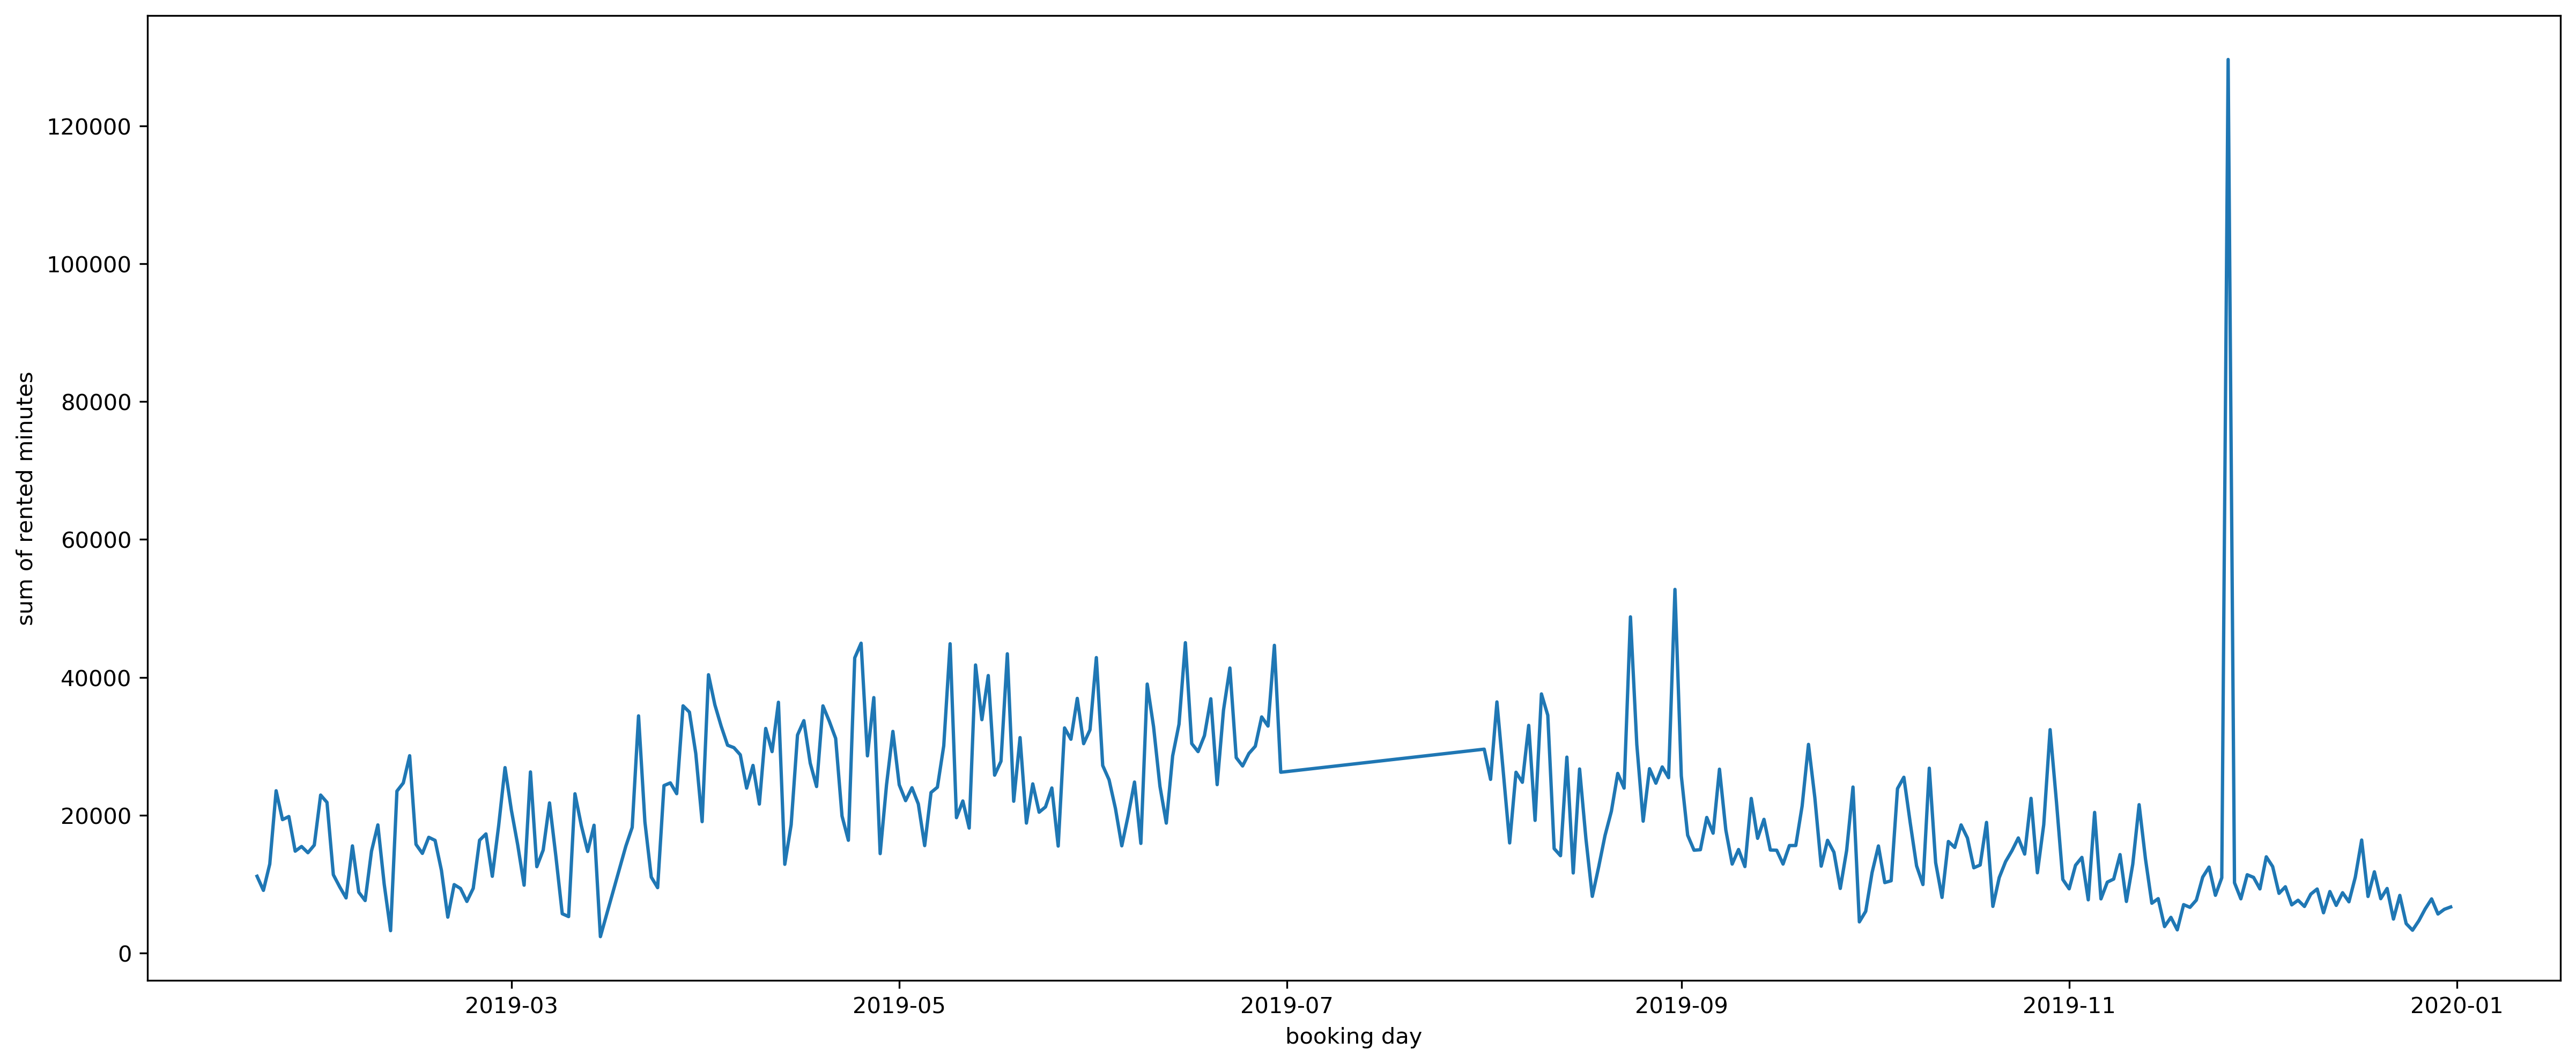

In [30]:
#display trips, so we can see a trend:
lineplot(sub_day_rented_minutes2,"booking day", "sum of rented minutes", "sub_day_rented_minutes2" )
lineplot(sub_day_rented_minutes3,"booking day", "sum of rented minutes","sub_day_rented_minutes3" )
lineplot(sub_day_rented_minutes,"booking day", "sum of rented minutes", "sub_day_rented_minutes" )



# Analyzing trip duration on average

In [31]:
# rented minutes on average per day
avg_rented_minutes = (bremen_trips.groupby('booking_date')
                                 .duration_min.mean()
                              )
avg_rented_minutes.describe().astype(int)

count     312
mean      226
std       473
min         6
25%        53
50%       110
75%       224
max      4670
Name: duration_min, dtype: int64

Here, on the total bremen trip dataset the standard deviation is again more than twice as big as the mean

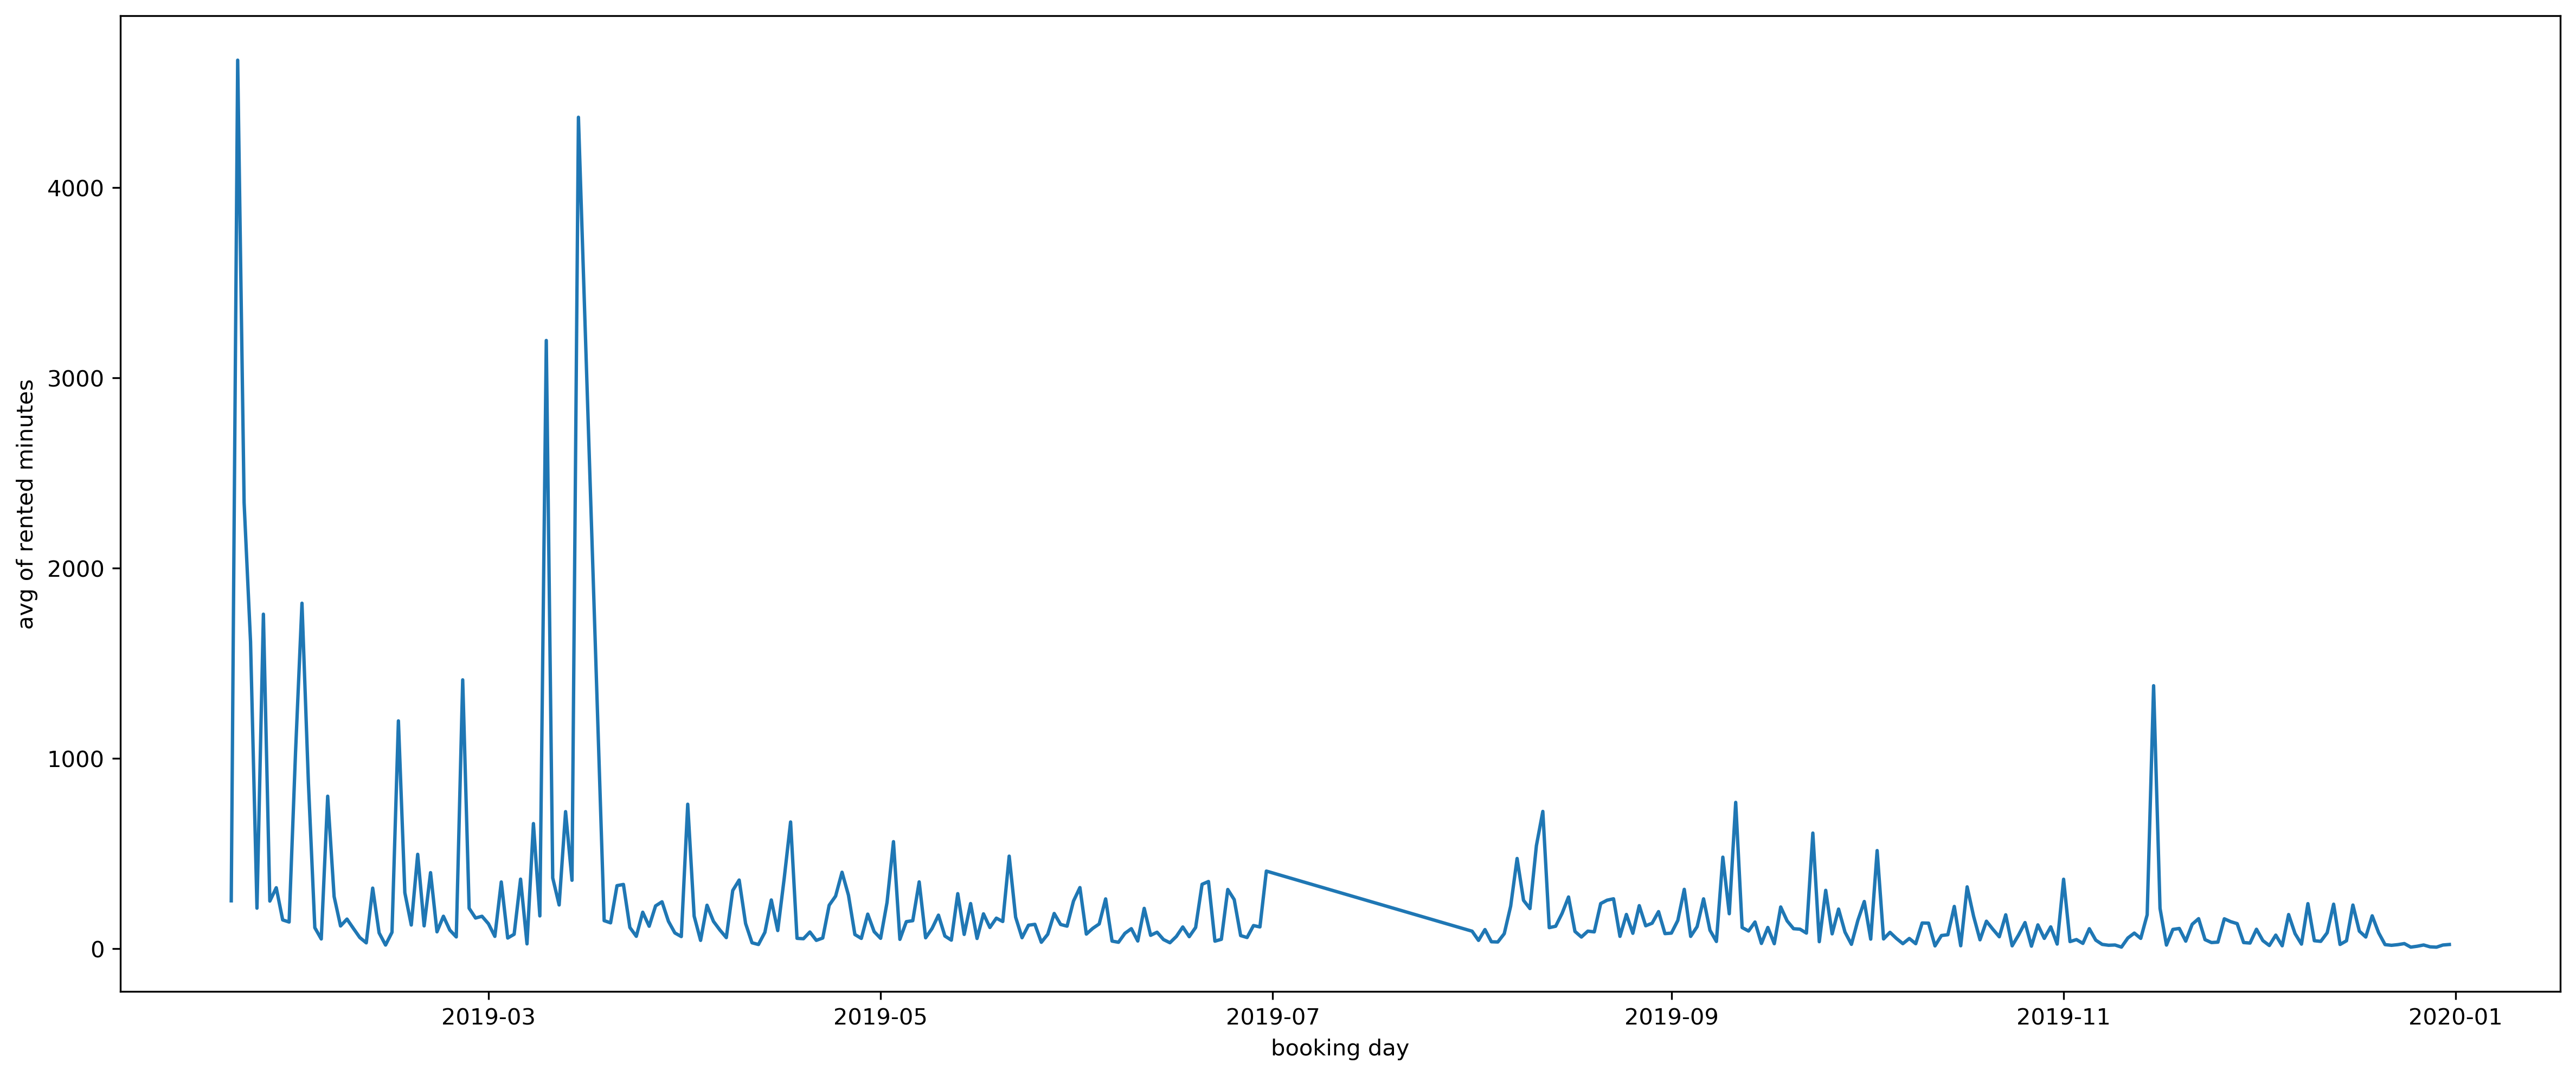

In [32]:
lineplot(avg_rented_minutes,'booking day','avg of rented minutes',"avg_rented_minutes" )

In [33]:
# rented minutes on average per day < 1500

avg_rented_minutes_1500 = avg_rented_minutes[avg_rented_minutes < 1500]
avg_rented_minutes_1500 = (avg_rented_minutes_1500.groupby('booking_date')
                                 .mean()
                              )
avg_rented_minutes_1500.describe().astype(int)

count     305
mean      166
std       195
min         6
25%        53
50%       105
75%       211
max      1412
Name: duration_min, dtype: int64

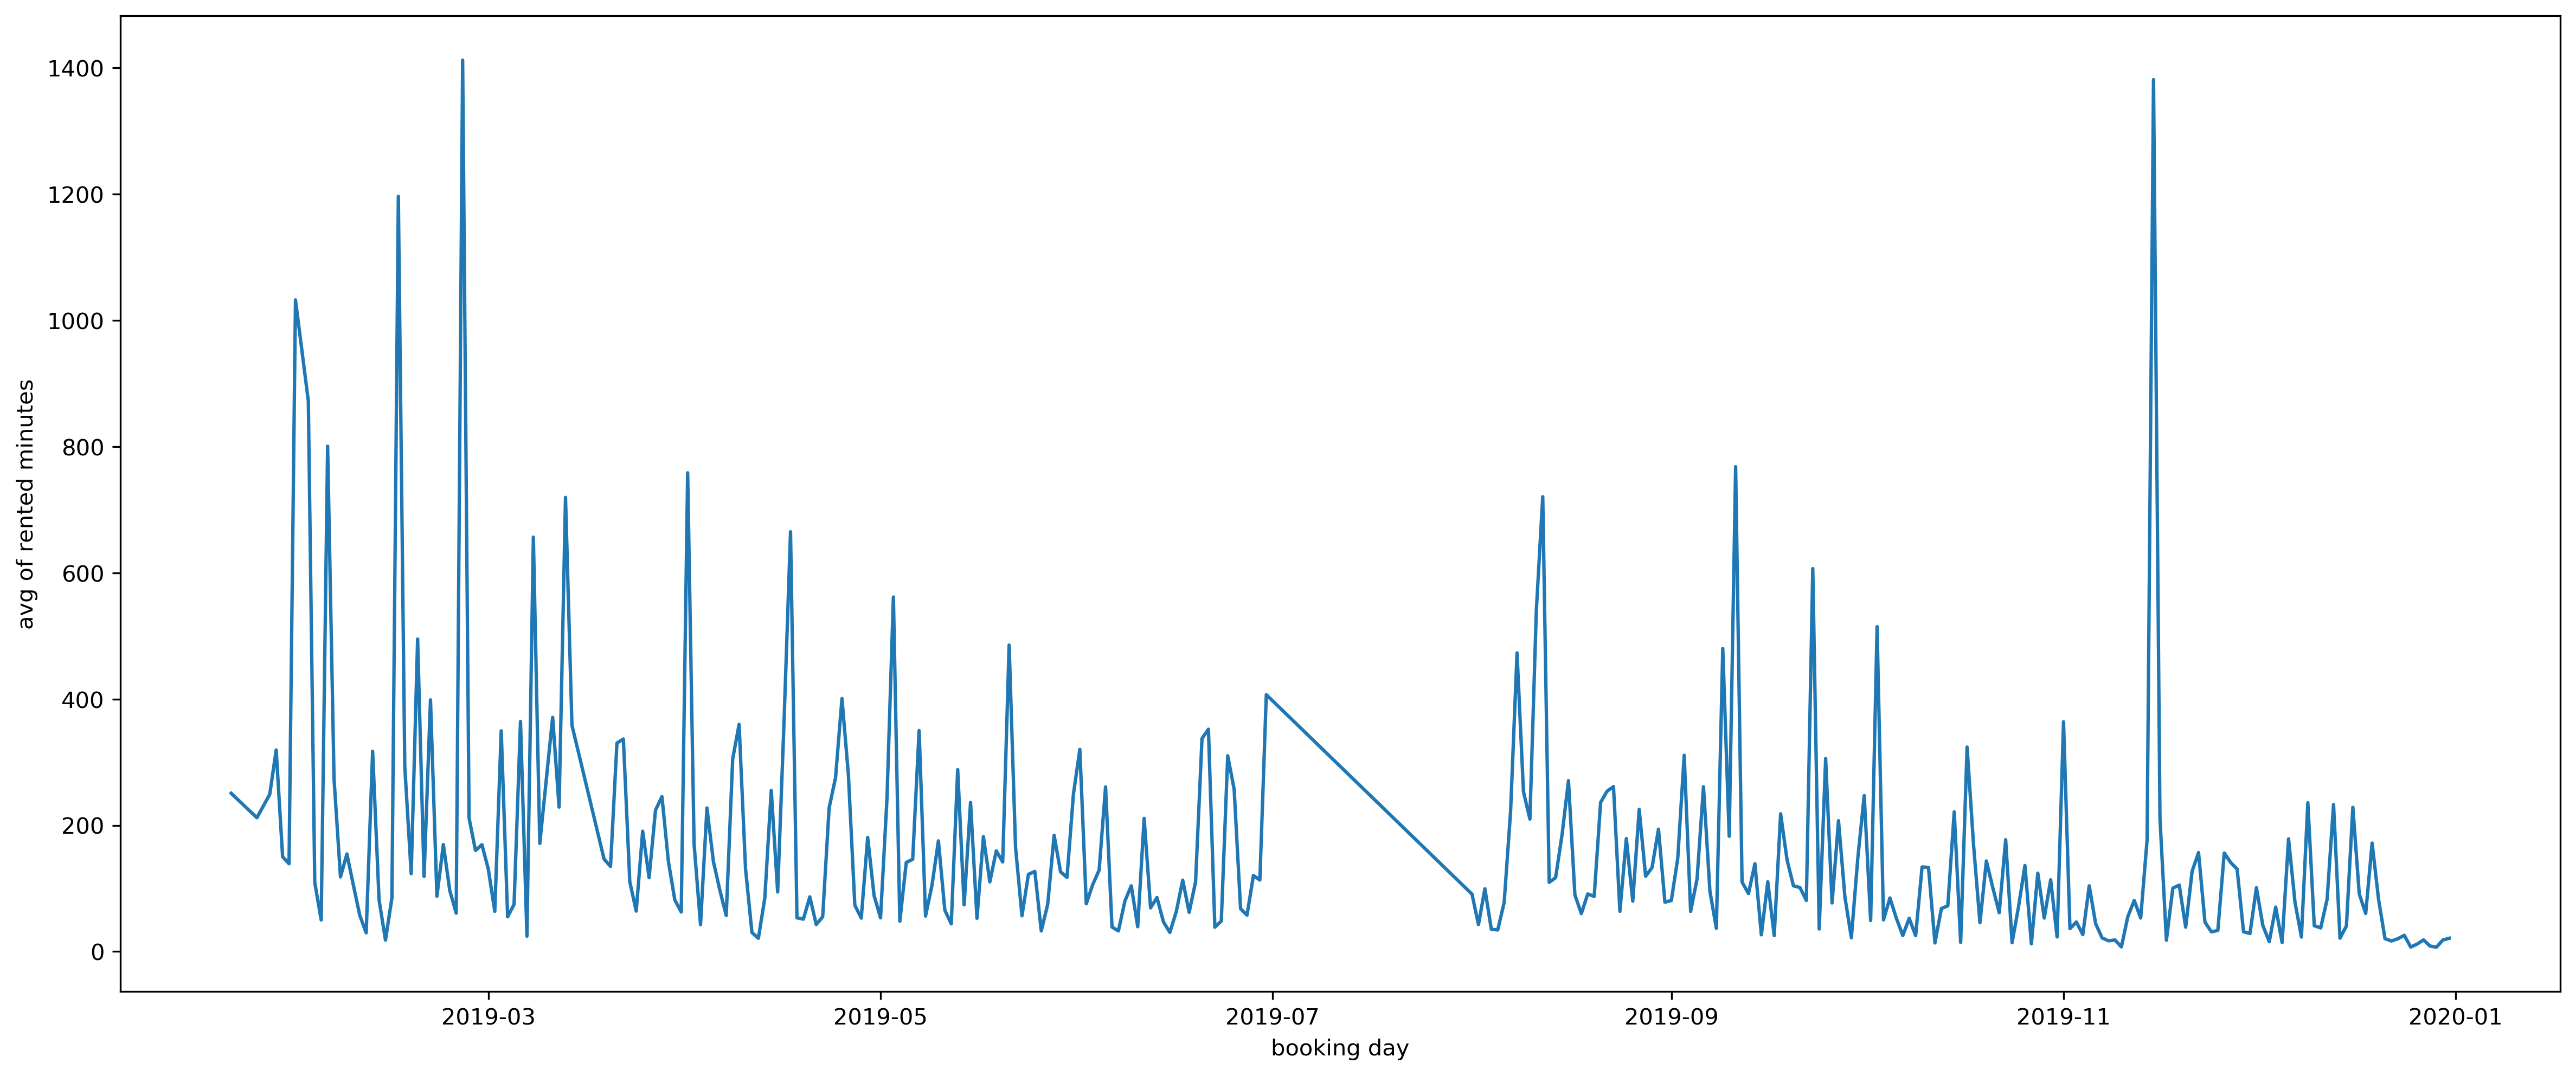

In [34]:
lineplot(avg_rented_minutes_1500,'booking day','avg of rented minutes',"avg_rented_minutes_1500" )

The average trip duration seems to be independent from seasons.

# Number of bookings per day

In [35]:
# demand daily bookings dataset bremen trips
day_bookings_trips= (bremen_trips.groupby("booking_date").booking_date.count())
day_bookings_trips.describe().astype(int)

count     312
mean      746
std       640
min       101
25%       406
50%       655
75%       911
max      6491
Name: booking_date, dtype: int64

The mean and median don't differ as much as compared to trip duration. We can still detect outliers as the 75th percentile differs a lot from max. value.

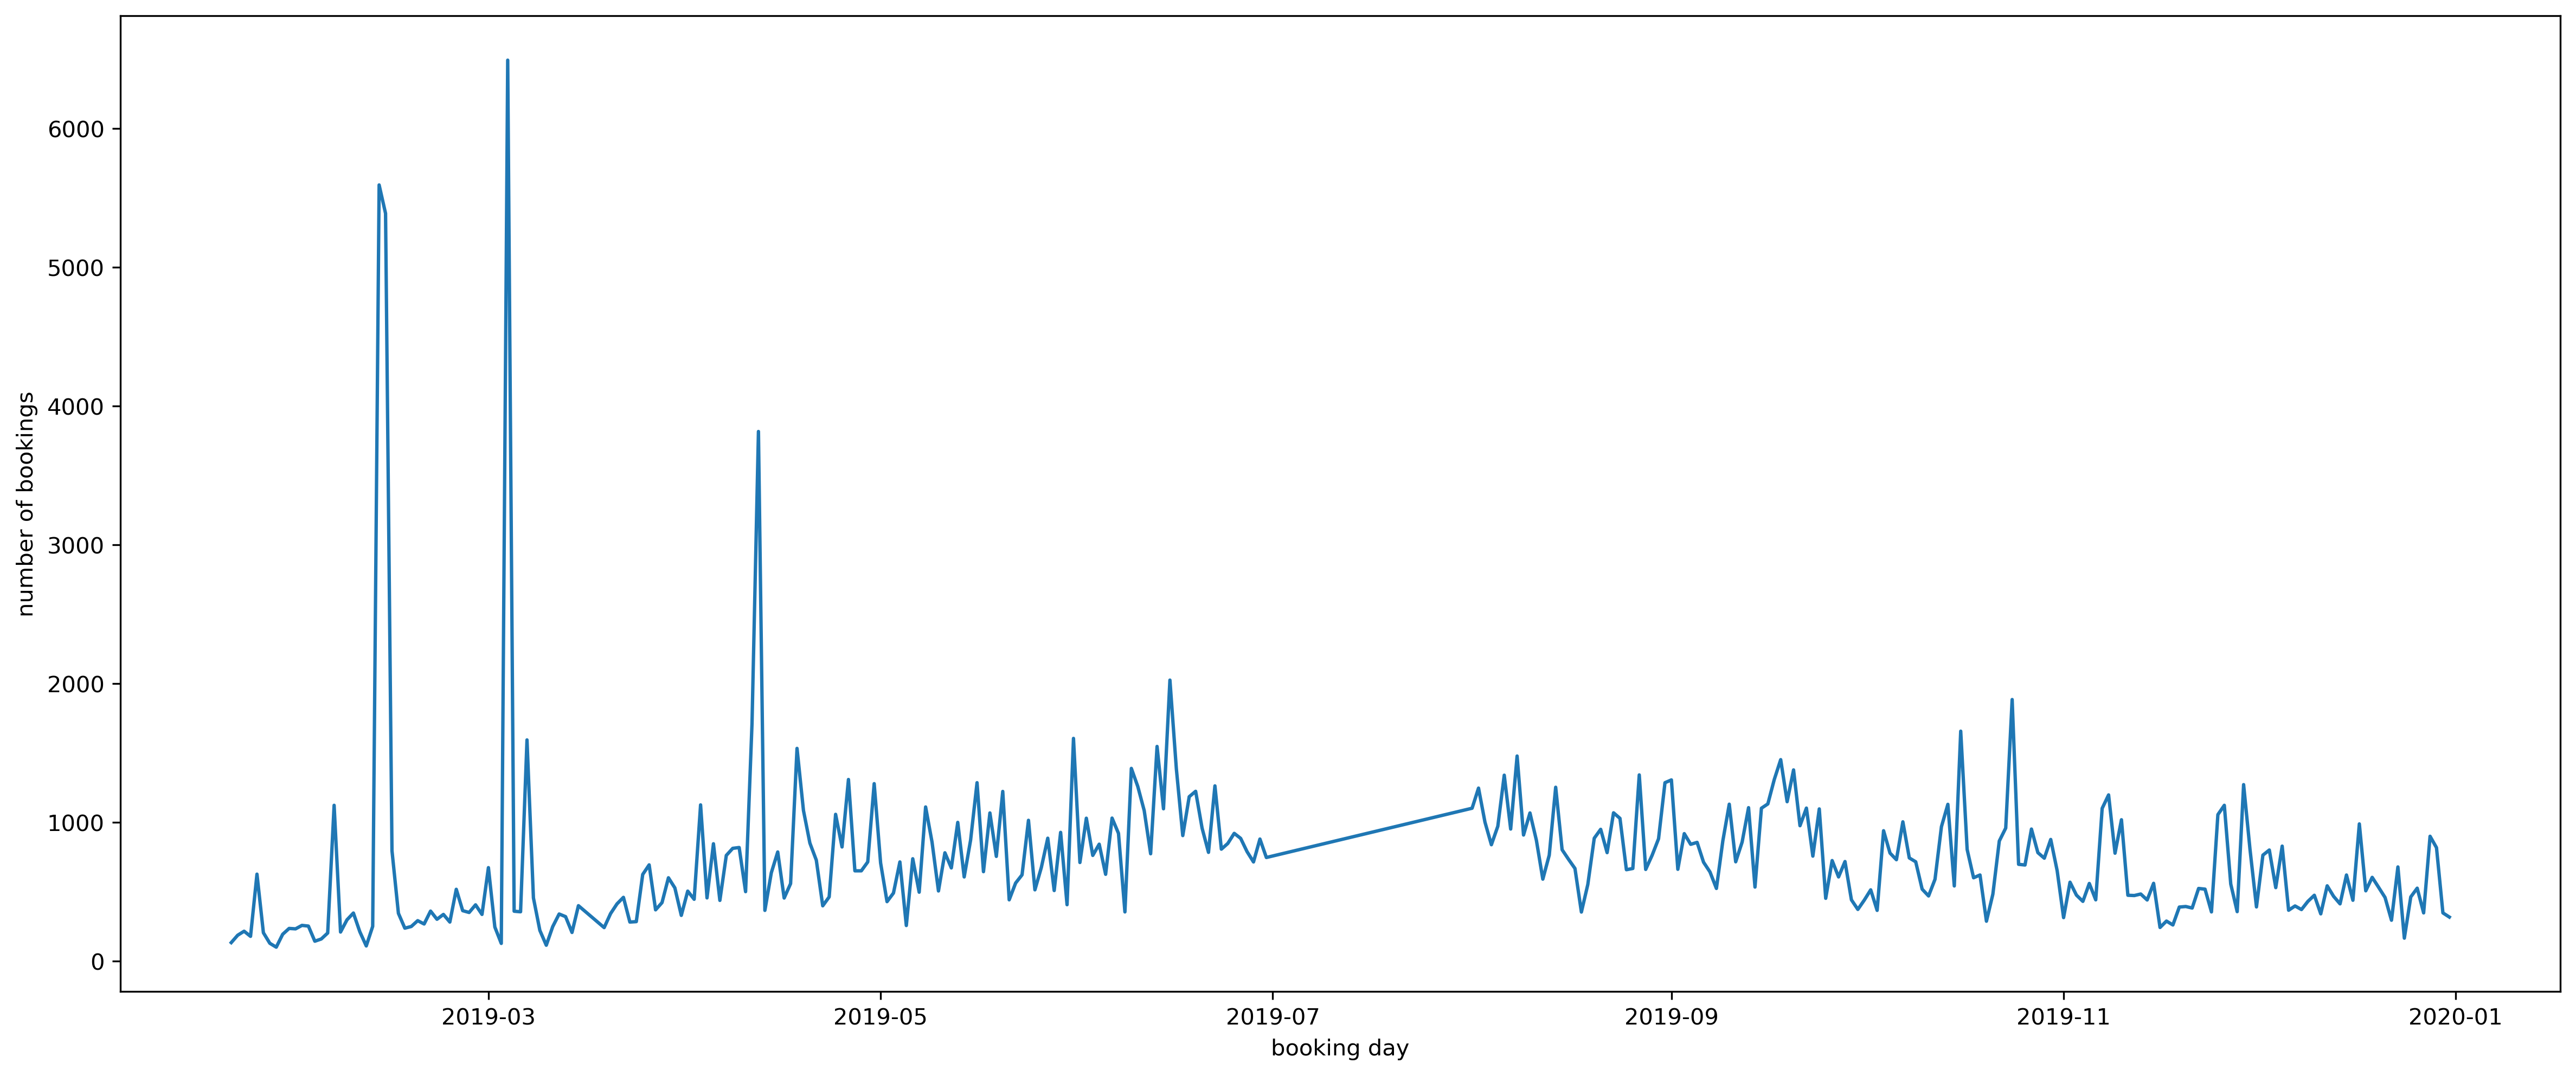

In [36]:
#Lineplot daily demand bookings: dataset bremen trips
lineplot(day_bookings_trips,"booking day","number of bookings", "day_bookings_trips" )

In [37]:
sub_day_bookings_trips = day_bookings_trips[day_bookings_trips < 2000]

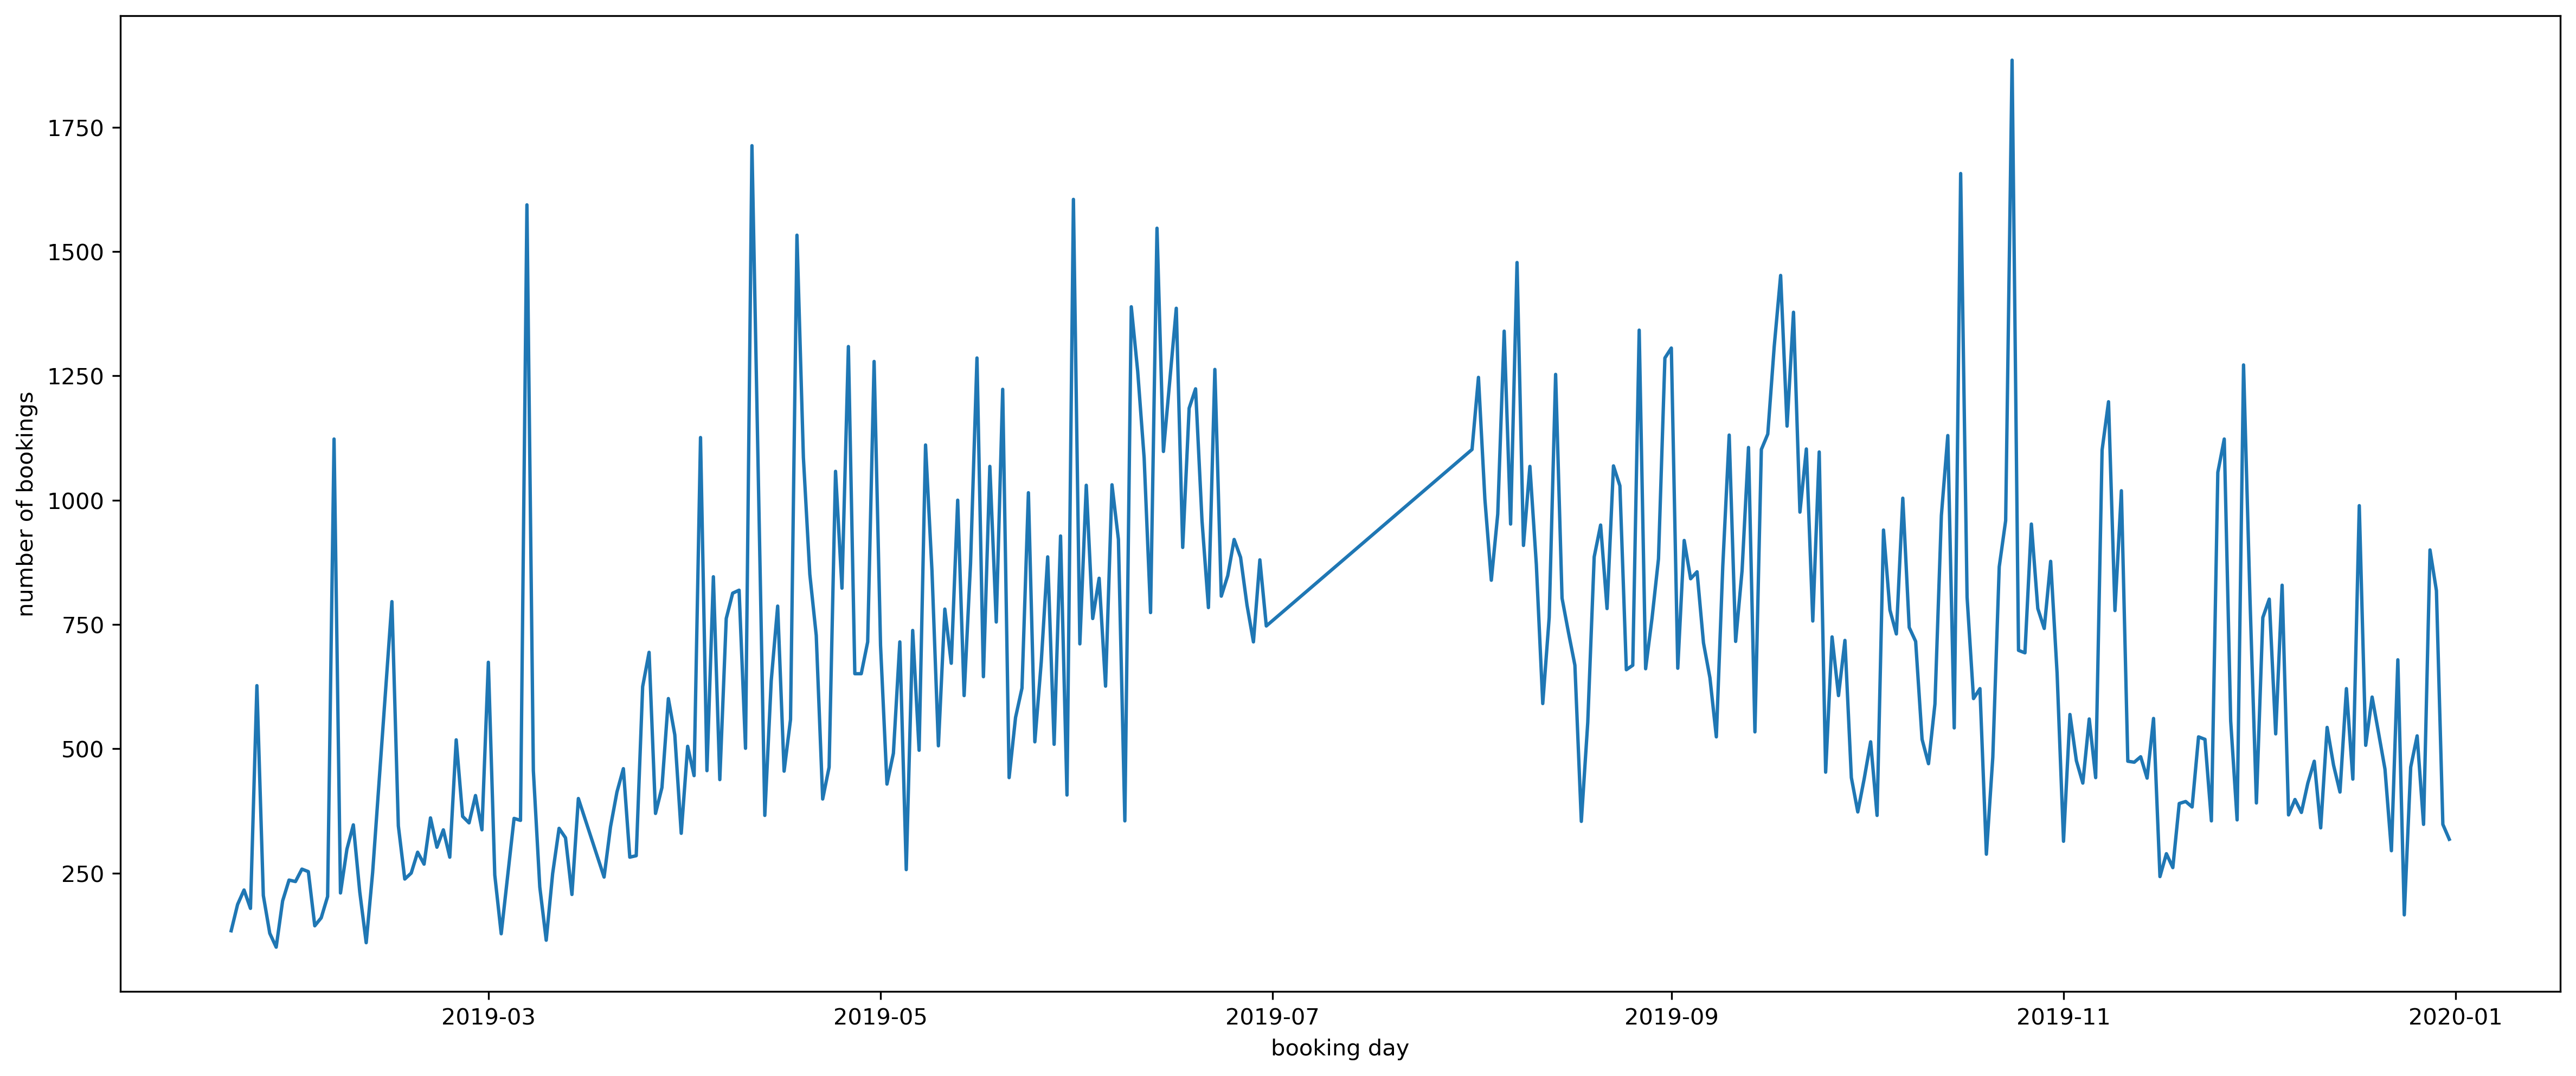

In [38]:
lineplot(sub_day_bookings_trips,"booking day","number of bookings", "sub_day_bookings_trips" )

We can see a seasonal trend. During the summer months we have more bookings as compared to winter

# Analyzing trip duration for different time frames

In [39]:
#Sum rented minutes a month
month_rented_minutes = (bremen_trips.groupby('month')
                                 .duration_min.sum()
                              )
month_rented_minutes.describe().astype(int)

count         11
mean     3328952
std      1240240
min      1003707
25%      2578762
50%      3508154
75%      4174175
max      5163608
Name: duration_min, dtype: int64

Here we see that a whole month is missing. Mean and median do not differ so much. Standard deviation is way smaller than mean. It is interesting to see, that the statistics look different when analyzing the trip duration monthly and not totally.

In [40]:
month_rented_minutes # july is missing

month
1     3030373.0
2     3226887.0
3     4588846.0
4     4048118.0
5     3508154.0
6     3661621.0
8     5163608.0
9     4300232.0
10    2127151.0
11    1959777.0
12    1003707.0
Name: duration_min, dtype: float64

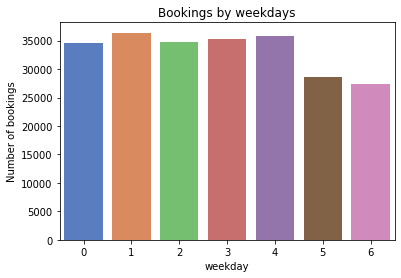

In [65]:
#Number of bookings by days of the week
weekdays = bremen_trips.groupby("weekdays").start_time.count()
weekdays
ax = sns.barplot(x=weekdays.index, y=weekdays, palette="muted")
ax.set(ylabel='Number of bookings', xlabel='weekday')
ax.set_title('Bookings by weekdays')
plt.savefig("../pictures/bookings_by_weekdays.png", dpi = 300)

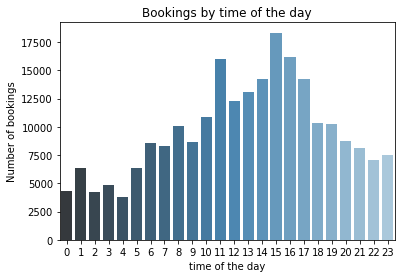

In [66]:
#Number of bookings by time
hour_day = bremen_trips.start_time.dt.hour.value_counts()
ax = sns.barplot(x=hour_day.index, y=hour_day, palette="Blues_d")
ax.set(ylabel='Number of bookings', xlabel='time of the day') 
ax.set_title('Bookings by time of the day')
plt.savefig("../pictures/bookings_by_time_otd.png", dpi = 300)

It is hard to make out a typical rushhour from 7-9 or 16-18 o'clock. The peaks differ from that. It would be interesting to find out, were those trips are going the most to (maybe schools or universities)

Text(0.5, 1.0, 'Number of bookings by time of the day and weekday')

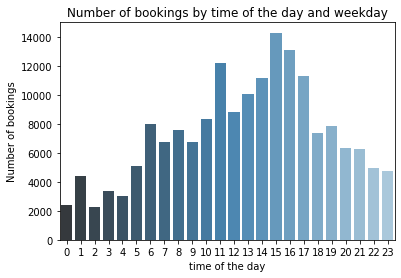

In [68]:
#Number of bookings by time of the day and weekday
weekdays_group = bremen_trips[bremen_trips["weekdays"] < 5]
hour_of_day__weekday = weekdays_group.start_time.dt.hour.value_counts()
ax = sns.barplot(x=hour_of_day__weekday.index, y=hour_of_day__weekday, palette="Blues_d")
ax.set(ylabel='Number of bookings', xlabel='time of the day') 
ax.set_title('Number of bookings by time of the day and weekday')

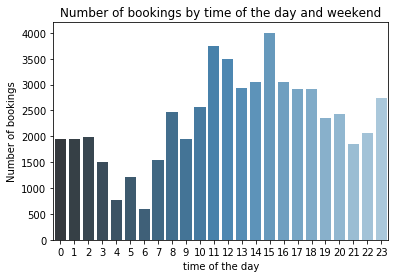

In [69]:
#Number of bookings by time and weekend 
weekend_group = bremen_trips[bremen_trips["weekdays"] > 4]
hour_of_day_weekend = weekend_group.start_time.dt.hour.value_counts()
ax = sns.barplot(x=hour_of_day_weekend.index, y=hour_of_day_weekend, palette="Blues_d")
ax.set(ylabel='Number of bookings', xlabel='time of the day') 
ax.set_title('Number of bookings by time of the day and weekend')
plt.savefig("../pictures/bookings_by_time_otd_weekend.png", dpi = 300)


When we compare this graph to weekdays, we see that less bikes are rented on the weekend (y axis: 14.000 vs 4.000).

In [45]:
display(hour_day.describe(),hour_of_day__weekday.describe(),hour_of_day_weekend.describe())

count       24.000000
mean      9701.875000
std       4041.832336
min       3782.000000
25%       6881.000000
50%       8730.500000
75%      12494.500000
max      18326.000000
Name: start_time, dtype: float64

count       24.000000
mean      7368.833333
std       3373.071116
min       2268.000000
25%       4935.000000
50%       7086.000000
75%       9141.750000
max      14324.000000
Name: start_time, dtype: float64

count      24.000000
mean     2333.041667
std       867.687956
min       594.000000
25%      1916.500000
50%      2386.000000
75%      2916.250000
max      4002.000000
Name: start_time, dtype: float64

When you compare the median you can clearly see that less bikes are rented at the weekend 

# Situational analysis

In [46]:
with open('../data/external/station_information.json') as json_file:
    data = json.load(json_file)
data = pd.DataFrame(data['data']['stations'])
data

station_id                                name short_name        lat  \
0     2351602           WESER-KURIER | Pressehaus       2910  53.076722   
1     7872668                           Am Dobben       2925  53.078194   
2     7872701                      Am Speicher XI       2926  53.097556   
3     7872739                  Bahnhof Blumenthal       2927  53.182889   
4     7872765                Bahnhof Bremen-Farge       2928  53.205417   
..        ...                                 ...        ...        ...   
78   16521413                   Irgendwo Festival       2920  53.057878   
79   17322575  Mondelez Deutschland Services GmbH       2921  53.091283   
80   17322791  Die Sparkasse Bremen Mühlenviertel       2922  53.101909   
81   17322858    Am Waller Strandpark Waller Sand       2923  53.103056   
82   29359657                        IKEA Brinkum       2924  53.027197   

         lon region_id  capacity  
0   8.803943       379       5.0  
1   8.823250       379       NaN  
2   8.770056       379       NaN  
3   8.580278       379       NaN  
4   8.517000       379       NaN  
..       ...       ...       ...  
78  8.786745       379       6.0  
79  8.775759       379       6.0  
80  8.880113       379       6.0  
81  8.753035       379       6.0  
82  8.803090       379       5.0  

[83 rows x 7 columns]

In [47]:
data.rename(
    columns={
        "short_name": "start_place",
        "name" :"start_name",
    },
    inplace=True
)

In [48]:
display(bremen_trips.info(), data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232845 entries, 81821 to 113816
Data columns (total 16 columns):
bike              232845 non-null int64
bike_type         232845 non-null int64
identification    232845 non-null int64
start_time        232845 non-null datetime64[ns]
end_time          232845 non-null object
duration_sec      232845 non-null float64
start_lng         232845 non-null float64
start_lat         232845 non-null float64
end_lng           232845 non-null float64
end_lat           232845 non-null float64
start_place       232845 non-null float64
end_place         232845 non-null float64
month             232845 non-null int64
booking_date      232845 non-null object
weekdays          232845 non-null int64
duration_min      232845 non-null float64
dtypes: datetime64[ns](1), float64(8), int64(5), object(2)
memory usage: 30.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 7 columns):
station_id     83 non-null object


None

None

In [49]:
#prepare for merge
bremen_trips["start_place"] = bremen_trips.start_place.astype(int)
data["start_place"] = data.start_place.astype(int)
bremen_trips["end_place"] = bremen_trips.end_place.astype(int)

data = data.sort_values(by=['start_place'], ascending=True)

columns = ["capacity", "region_id", "lon", "lat", "station_id"]
data = data.drop(columns, axis = 1)

In [50]:
data_start = data


In [51]:
data_start

start_name  start_place
0   WESER-KURIER | Pressehaus         2910
11           Flughafen Bremen         2911
38           Universum Bremen         2912
70    hanseWasser Bremen GmbH         2913
72               Messe Bremen         2914
..                        ...          ...
67      GEWOBA | Heideplatz 1         2989
61      KAEFER Isoliertechnik         2990
68              Waller Straße         2991
69  Caroline Henschel Strasse         2992
62             Uni Bremen TAB         2997

[83 rows x 2 columns]

In [52]:
bremen_trips = bremen_trips.sort_values(by=['start_place'], ascending=True)

In [53]:
station_information = pd.merge_asof(bremen_trips, data_start, on='start_place')


In [54]:
station_information

bike  bike_type  identification          start_time  \
0       20685         71        12099440 2019-01-20 00:13:00   
1       20889         71        21145383 2019-08-28 14:33:00   
2       20720         71        21144706 2019-08-28 14:34:00   
3       20742         71        21144648 2019-08-28 14:34:00   
4       20535         71        21144405 2019-08-28 14:34:00   
...       ...        ...             ...                 ...   
232840  20709         71        12753717 2019-02-14 19:26:00   
232841  20851         71        10084718 2019-01-24 09:15:00   
232842  20698         71        10084718 2019-01-26 08:31:00   
232843  20965         71        13009312 2019-02-26 21:10:00   
232844  20951         71         7873874 2019-02-20 15:52:00   

                   end_time  duration_sec  start_lng  start_lat   end_lng  \
0       2019-01-20 00:23:00         600.0   8.812554  53.076481  8.804828   
1       2019-08-28 14:51:00        1080.0   8.790247  53.083529  8.802078   
2       2019-08-28 14:41:00         420.0   8.829788  53.074404  8.826693   
3       2019-08-28 14:40:00         360.0   8.893711  53.081049  8.890051   
4       2019-08-28 14:36:00         120.0   8.800624  53.097307  8.800486   
...                     ...           ...        ...        ...       ...   
232840  2019-02-14 20:09:00        2580.0   8.860495  53.109130  8.792775   
232841  2019-01-24 09:17:00         120.0   8.860495  53.109130  8.860495   
232842  2019-01-26 13:28:00       17820.0   8.860495  53.109130  8.860495   
232843  2019-02-26 21:49:00        2340.0   8.860495  53.109130  8.793725   
232844  2019-02-20 16:08:00         960.0   8.860495  53.109130  8.831583   

          end_lat  start_place  end_place  month booking_date  weekdays  \
0       53.084196            0          0      1   2019-01-20         6   
1       53.082684            0          0      8   2019-08-28         2   
2       53.073973            0          0      8   2019-08-28         2   
3       53.086102            0          0      8   2019-08-28         2   
4       53.097276            0          0      8   2019-08-28         2   
...           ...          ...        ...    ...          ...       ...   
232840  53.069258        29860          0      2   2019-02-14         3   
232841  53.109130        29860      29860      1   2019-01-24         3   
232842  53.109130        29860      29860      1   2019-01-26         5   
232843  53.068724        29860          0      2   2019-02-26         1   
232844  53.086139        29860       2965      2   2019-02-20         2   

        duration_min      start_name  
0               10.0             NaN  
1               18.0             NaN  
2                7.0             NaN  
3                6.0             NaN  
4                2.0             NaN  
...              ...             ...  
232840          43.0  Uni Bremen TAB  
232841           2.0  Uni Bremen TAB  
232842         297.0  Uni Bremen TAB  
232843          39.0  Uni Bremen TAB  
232844          16.0  Uni Bremen TAB  

[232845 rows x 17 columns]

In [55]:
data_end = data
data_end.rename(
    columns={
        "start_place": "end_place",
        "start_name" :"end_name",
    },
    inplace=True
)

In [56]:
station_information = pd.merge_asof(station_information.sort_values(by=['end_place'], ascending=True), data_end, on='end_place')

In [57]:
station_information = station_information.sort_values(by=['start_time'], ascending=True)

In [58]:
station_information.head()

bike  bike_type  identification          start_time  \
0       20685         71        12099440 2019-01-20 00:13:00   
225283  20626         71        10278649 2019-01-20 00:16:00   
192866  20935         71         7873316 2019-01-20 00:35:00   
16731   20617         71        12099749 2019-01-20 00:40:00   
16732   20795         71        12099872 2019-01-20 00:47:00   

                   end_time  duration_sec  start_lng  start_lat   end_lng  \
0       2019-01-20 00:23:00         600.0   8.812554  53.076481  8.804828   
225283  2019-01-20 04:47:00       16260.0   8.884911  53.078923  8.884911   
192866  2019-01-25 08:00:00      458700.0   8.816798  53.072448  8.811472   
16731   2019-01-20 00:44:00         240.0   8.801623  53.067878  8.793217   
16732   2019-01-20 00:54:00         420.0   8.814744  53.084841  8.801135   

          end_lat  start_place  end_place  month booking_date  weekdays  \
0       53.084196            0          0      1   2019-01-20         6   
225283  53.078923         2985       2985      1   2019-01-20         6   
192866  53.083167            0       2946      1   2019-01-20         6   
16731   53.064244            0          0      1   2019-01-20         6   
16732   53.094596            0          0      1   2019-01-20         6   

        duration_min                   start_name  \
0               10.0                          NaN   
225283         271.0  GEWOBA | Kurt-Schumacher 11   
192866        7645.0                          NaN   
16731            4.0                          NaN   
16732            7.0                          NaN   

                             end_name  
0                                 NaN  
225283    GEWOBA | Kurt-Schumacher 11  
192866  Hauptbahnhof / Übersee Museum  
16731                             NaN  
16732                             NaN

In [59]:
#most used start_place
#pd.set_option("display.max.rows", bremen_trips.shape[0]+1)
station_information.start_name.value_counts()


Hauptbahnhof / Übersee Museum       6653
WESER-KURIER | Pressehaus           2409
GOP / Steigenberger                 1815
Park Hotel                          1771
P und R Sielhof                     1666
                                    ... 
Hochschule Bremen Werderstrasse      288
Findorffmarkt                        241
Europahafen / Hansator               223
Am Waller Strandpark Waller Sand     212
Irgendwo Festival                     34
Name: start_name, Length: 76, dtype: int64

In [60]:
#most used end_place
station_information.end_name.value_counts()

Hauptbahnhof / Übersee Museum       6103
WESER-KURIER | Pressehaus           2167
Park Hotel                          1725
GOP / Steigenberger                 1720
Haltestelle Borgfelder Allee        1607
                                    ... 
Hochschule Bremen Werderstrasse      262
Europahafen / Hansator               213
Findorffmarkt                        212
Am Waller Strandpark Waller Sand     203
Irgendwo Festival                     31
Name: end_name, Length: 76, dtype: int64

In [61]:
#most popular roads: start_place to end_place
most_pr = (
    station_information.groupby(['start_name', 'end_name'])
      .agg({'duration_min':['count','min','max','mean','median','std','var']})
      .reset_index().sort_values(('duration_min','count'), ascending=False)
)
most_pr.head(n=10)



start_name  \
                                                       
936                    Hauptbahnhof / Übersee Museum   
729                     Haltestelle Borgfelder Allee   
1965                                   Wümme-Zeitung   
1418  Oberneulander Heerstr. / Rockwinkeler Heerstr.   
1479                                      Park Hotel   
1446                                 P und R Sielhof   
676                    Haltestelle Alfred-Faust-Str.   
823                Haltestelle Lilienthal-Falkenberg   
548                      GEWOBA | Kurt-Schumacher 11   
571                          GEWOBA | Ludwig-Beck 2a   

                                            end_name duration_min       \
                                                            count  min   
936                    Hauptbahnhof / Übersee Museum         1974  2.0   
729                     Haltestelle Borgfelder Allee         1346  2.0   
1965                                   Wümme-Zeitung         1204  2.0   
1418  Oberneulander Heerstr. / Rockwinkeler Heerstr.         1202  2.0   
1479                                      Park Hotel         1129  2.0   
1446                                 P und R Sielhof         1123  2.0   
676                    Haltestelle Alfred-Faust-Str.         1093  2.0   
823                Haltestelle Lilienthal-Falkenberg         1076  2.0   
548                      GEWOBA | Kurt-Schumacher 11          937  2.0   
571                          GEWOBA | Ludwig-Beck 2a          898  2.0   

                                                        
         max       mean median        std          var  
936   1418.0  43.440729    6.0  88.913252  7905.566429  
729   1284.0  10.441308    2.0  61.628856  3798.115883  
1965   839.0   9.824751    2.0  50.704054  2570.901099  
1418   742.0   8.579035    2.0  41.244816  1701.134881  
1479   850.0  24.620018    2.0  74.837661  5600.675521  
1446  1026.0  12.408727    2.0  56.863954  3233.509264  
676    452.0   6.076853    2.0  26.499871   702.243173  
823    428.0   7.093866    2.0  33.034690  1091.290716  
548    839.0  22.690502    2.0  86.509054  7483.816502  
571   1203.0  16.004454    2.0  82.642937  6829.855053

In [62]:
# Most popular zones
station_information.start_name.value_counts()
df_origin_freq = station_information.start_name.value_counts().reset_index()
df_origin_freq.rename(
    columns={
        "index": "rental_zone",
        "start_name": "start",
    },
    inplace=True
)
df_origin_freq
df_origin_freq.columns = ['rental_zone','start']
df_dest_freq = station_information.end_name.value_counts().reset_index()
df_dest_freq.rename(
    columns={
        "index": "rental_zone",
        "start_place": "end",
    },
    inplace=True
)
df_dest_freq.columns = ['rental_zone','end']

popular_zones_merged = pd.merge(df_origin_freq, df_dest_freq, on='rental_zone')
popular_zones_merged['diff'] = popular_zones_merged.end - popular_zones_merged.start
popular_zones_merged

rental_zone  start   end  diff
0      Hauptbahnhof / Übersee Museum   6653  6103  -550
1          WESER-KURIER | Pressehaus   2409  2167  -242
2                GOP / Steigenberger   1815  1720   -95
3                         Park Hotel   1771  1725   -46
4                    P und R Sielhof   1666  1593   -73
..                               ...    ...   ...   ...
71   Hochschule Bremen Werderstrasse    288   262   -26
72                     Findorffmarkt    241   212   -29
73            Europahafen / Hansator    223   213   -10
74  Am Waller Strandpark Waller Sand    212   203    -9
75                 Irgendwo Festival     34    31    -3

[76 rows x 4 columns]

Here you see, that at "Hauptbahnhof / Übersee Museum" more trips are starting than ending.

In [63]:
# High bicycle demand
popular_zones_merged.sort_values('diff').head()

rental_zone  start   end  diff
0   Hauptbahnhof / Übersee Museum   6653  6103  -550
1       WESER-KURIER | Pressehaus   2409  2167  -242
20          Gottfried-Menken-Str.   1163  1013  -150
59        Theater am Leibnizplatz    526   398  -128
45       Haltestelle Gastfeldstr.    815   689  -126

In [64]:
# High bicycle supply
popular_zones_merged.sort_values('diff', ascending=False).head()

rental_zone  start   end  diff
38                   Meierei im Bürgerpark    878   882     4
6             Haltestelle Borgfelder Allee   1603  1607     4
39  Mühlenfeldstr. / Rockwinkeler Heerstr.    858   862     4
22       Haltestelle Lilienthal-Falkenberg   1148  1152     4
37              Karl-Marx-Str. / Ohserstr.    896   899     3